In [74]:
dataset = dataset.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1)
print("Columns: {}".format(dataset.columns))

Columns: Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff', 'missed_appointment_before'],
      dtype='object')


Let's great dummy columns to accomodate all neighborhoods.

In [75]:
dataset = pd.concat([dataset.drop('Neighbourhood', axis = 1), 
           pd.get_dummies(dataset['Neighbourhood'])], axis=1)

Now, let's map the Gender column to random values, here 'M' as 0 and 'F' as 1.

In [76]:
gender_map = {'M': 0, 'F': 1}
dataset['Gender'] = dataset['Gender'].map(gender_map)

Next, I'll split the dataset into train and test data.

In [77]:
y = dataset.loc[:, 'Showed_up']
X = dataset.drop(['Showed_up'], axis = 1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [79]:
print("Final shape: {}".format(X_train.shape))

Final shape: (71681, 91)


In [82]:
# Identify columns with object or boolean data types
non_numeric_columns = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")


# Convert 'True'/'False' strings to 1/0
for col in non_numeric_columns:
    if X_train[col].isin(['True', 'False']).all():
        X_train[col] = X_train[col].map({'True': 1, 'False': 0})
        X_test[col] = X_test[col].map({'True': 1, 'False': 0})




Non-numeric columns: ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']


Let's now scale the data to make it ready for the Neural Network.

In [83]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

In [84]:
classifier = Sequential()
classifier.add(Dense(units = 512, activation = 'relu', input_dim = 91))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 2048, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               47104     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 2048)              2099200   
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [85]:
history = classifier.fit(X_train, y_train, epochs = 5, validation_split = 0.1)

Epoch 1/5
2016/2016 [==============================] - 122s 60ms/step - loss: 0.3743 - accuracy: 0.8773 - val_loss: 0.3507 - val_accuracy: 0.8813
Epoch 2/5
2016/2016 [==============================] - 123s 61ms/step - loss: 0.3538 - accuracy: 0.8833 - val_loss: 0.3418 - val_accuracy: 0.8825
Epoch 3/5
2016/2016 [==============================] - 123s 61ms/step - loss: 0.3494 - accuracy: 0.8837 - val_loss: 0.3401 - val_accuracy: 0.8827
Epoch 4/5
2016/2016 [==============================] - 123s 61ms/step - loss: 0.3480 - accuracy: 0.8836 - val_loss: 0.3389 - val_accuracy: 0.8827
Epoch 5/5
2016/2016 [==============================] - 124s 61ms/step - loss: 0.3461 - accuracy: 0.8835 - val_loss: 0.3396 - val_accuracy: 0.8827


Model prediction


As the model is now ready and trained, let's test on the test data. For a baseline, I'll also write the difference between the two classes in the test data.

In [86]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

1104/1104 [==============================] - 6s 5ms/step


In [87]:
print("Test data description:")
print("{}".format(y_test.value_counts()))
print("-"*50)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Test data description:
1    28147
0     7159
Name: Showed_up, dtype: int64
--------------------------------------------------
Confusion matrix:
[[ 3029  4130]
 [    0 28147]]
Accuracy: 88.30%


Conclusion


Using ANN with data engineering, I was able to achieve an accuracy of over 88% in predicting whether someone would show up or not for their appointment.

Fmale & True Showed_up : 55843
Fmale & False Showed_up : 14275
Male & True Showed_up : 29464
Male & False Showed_up : 7405


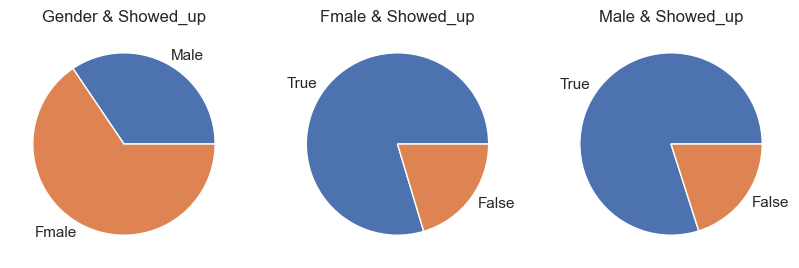

(106987, 9)
(106987,)
(106987, 5)
(74890, 5)
(74890,)
(32097, 5)
(32097,)
accuracy :  0.7656790354238714
              precision    recall  f1-score   support

       False       0.35      0.18      0.23      6517
        True       0.81      0.92      0.86     25580

    accuracy                           0.77     32097
   macro avg       0.58      0.55      0.55     32097
weighted avg       0.72      0.77      0.73     32097



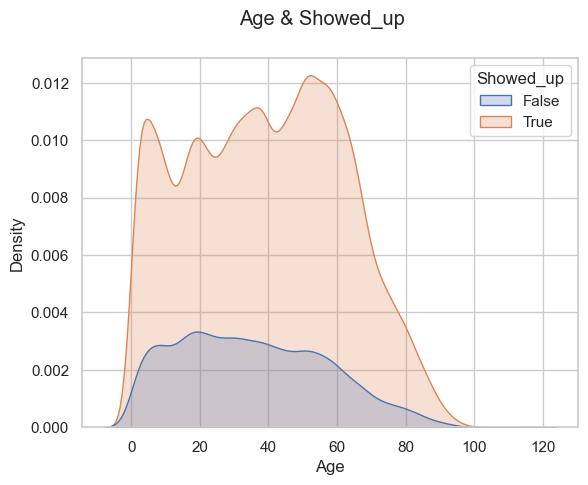

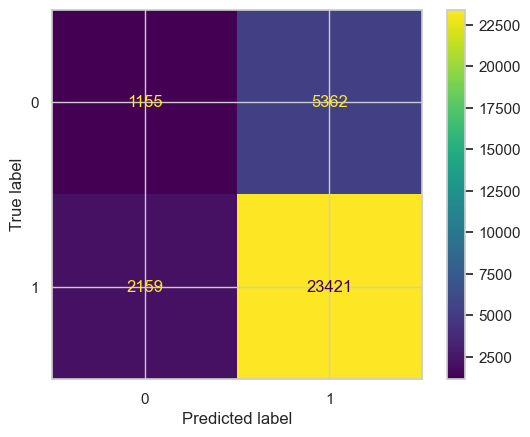

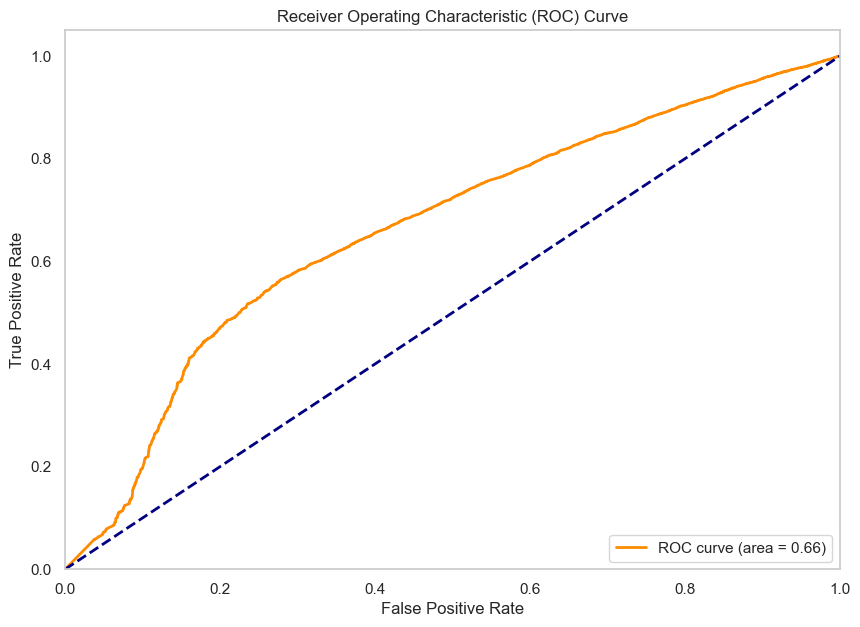

accuracy :  0.7970215284917593
              precision    recall  f1-score   support

       False       0.58      0.00      0.00      6517
        True       0.80      1.00      0.89     25580

    accuracy                           0.80     32097
   macro avg       0.69      0.50      0.44     32097
weighted avg       0.75      0.80      0.71     32097



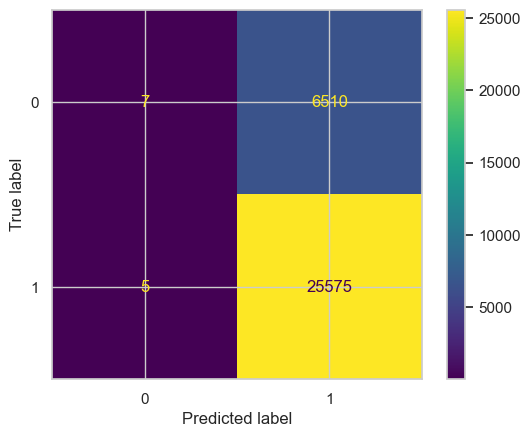

accuracy :  0.7920366389382185
              precision    recall  f1-score   support

       False       0.38      0.04      0.07      6517
        True       0.80      0.98      0.88     25580

    accuracy                           0.79     32097
   macro avg       0.59      0.51      0.47     32097
weighted avg       0.71      0.79      0.72     32097



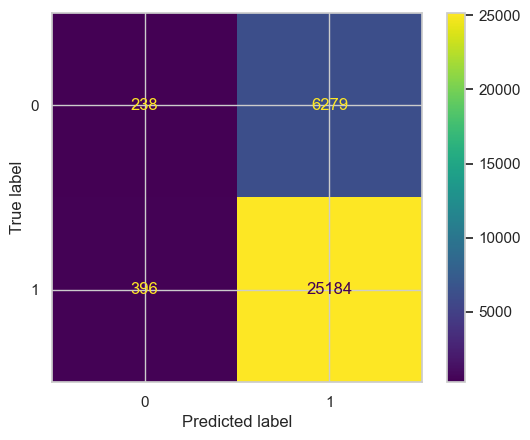

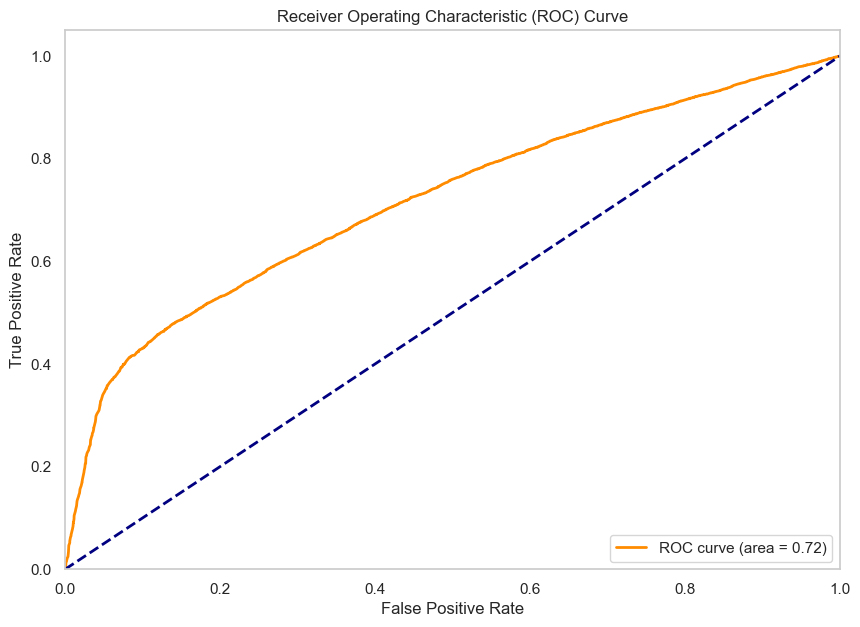

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               768       
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_20 (Dense)            (None, 8)                

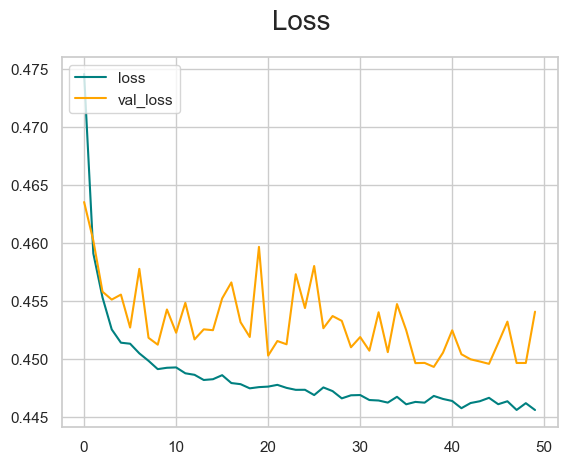

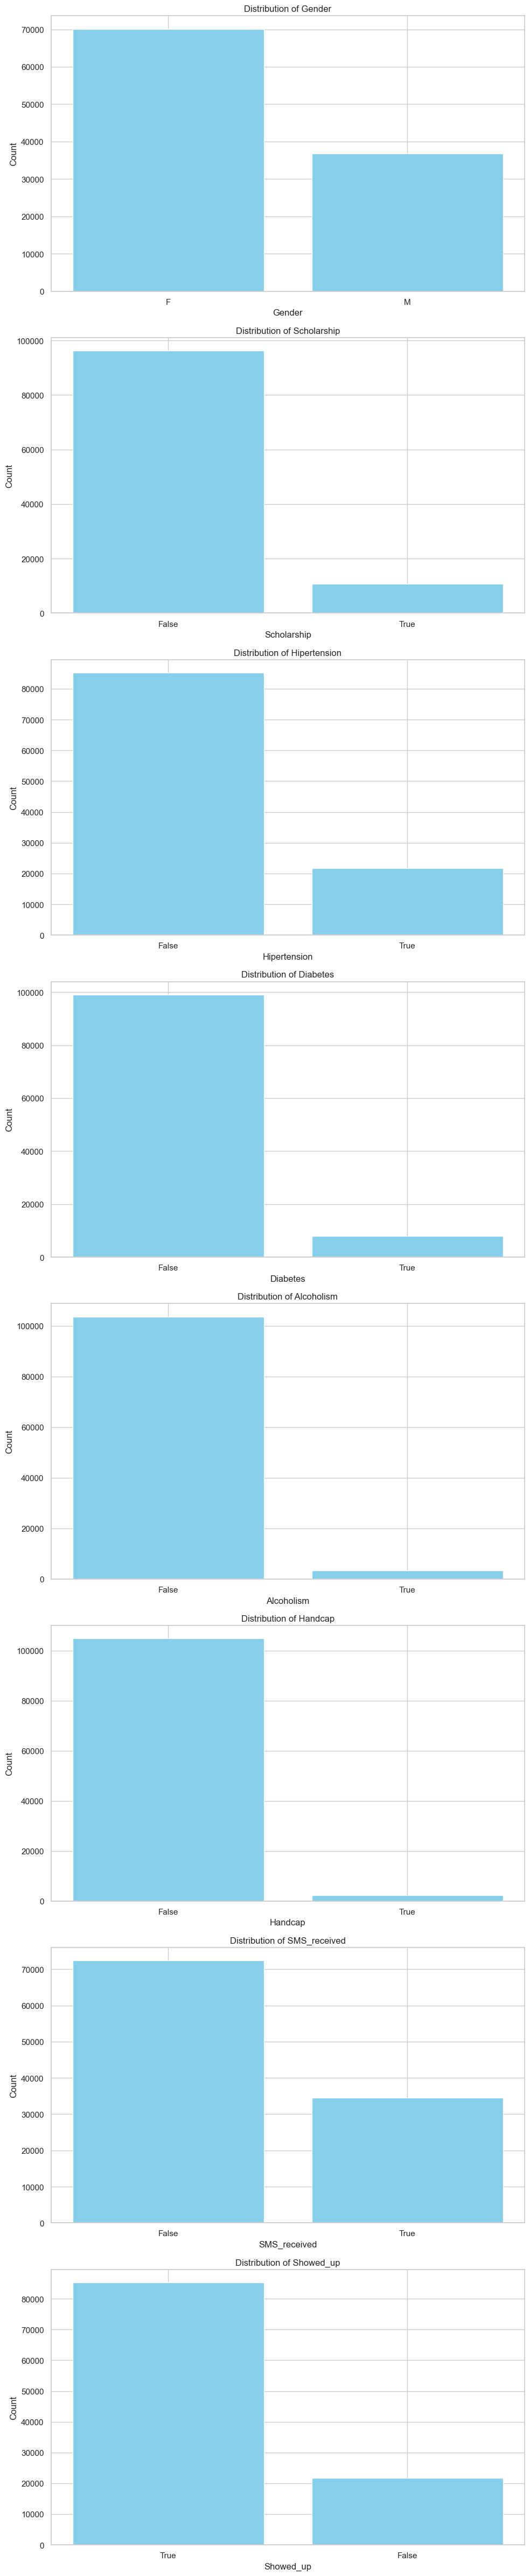

Correlation between 'missed_appointment_before' and 'Showed_up': 0.6102086525921376
Columns: Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff', 'missed_appointment_before'],
      dtype='object')
Final shape: (71681, 91)
Non-numeric columns: ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               47104     
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_

In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('\\data\\'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
        

#Data Analysis lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

import warnings

warnings.filterwarnings('ignore')


df = pd.read_csv('data\healthcare_noshows.csv')

Male_count = 0
Fmale_count = 0
for i in range(df.shape[0]):
    if df['Gender'][i]=='M':
        Male_count += 1
    else:
        Fmale_count += 1
        
y = np.array([Male_count, Fmale_count])

mylabels = ["Male", "Fmale"]
#.......
df_F = df.loc[(df['Gender']=="F")]

mylabels2 = ["True","False"]

True_Showed_up1 = len(df_F.loc[(df_F['Showed_up']==True)])

False_Showed_up1 = len(df_F.loc[(df_F['Showed_up']==False)])

y_F = np.array([True_Showed_up1, False_Showed_up1])

print("Fmale & True Showed_up :", True_Showed_up1)
print("Fmale & False Showed_up :", False_Showed_up1)

#.......
df_M = df.loc[(df['Gender']=="M")]

mylabels3 = ["True","False"]

True_Showed_up2 = len(df_M.loc[(df_M['Showed_up']==True)])

False_Showed_up2 = len(df_M.loc[(df_M['Showed_up']==False)])

y_M = np.array([True_Showed_up2, False_Showed_up2])

print("Male & True Showed_up :", True_Showed_up2)
print("Male & False Showed_up :", False_Showed_up2)
#.......

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(10,5))

axes[0].pie(y, labels = mylabels)
axes[0].set_title('Gender & Showed_up')

axes[1].pie(y_F, labels = mylabels2)
axes[1].set_title('Fmale & Showed_up')

axes[2].pie(y_M, labels = mylabels3)
axes[2].set_title('Male & Showed_up')

plt.show()


fig, axes = plt.figsize=(10,5)

plt.suptitle('Age & Showed_up')

sns.kdeplot(data=df, x='Age', hue='Showed_up', shade=True);

x = df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood','Showed_up'])
y = df['Showed_up']

print(x.shape)
print(y.shape)

def gender(x):
    if x == 'F':
        return 0
    else:
        return 1
    
x['Gender'] = x['Gender'].apply(gender)

x_new = SelectKBest(f_classif, k=5).fit_transform(x, y)

print(x_new.shape)


x_train, x_test, y_train, y_test = train_test_split(x_new,y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


scaler_data = preprocessing.StandardScaler()

x_train = scaler_data.fit_transform(x_train)


RF_model = RandomForestClassifier(random_state=42)

RF_model.fit(x_train, y_train)

x_test = scaler_data.fit_transform(x_test)

RF_predict = RF_model.predict(x_test)


print('accuracy : ',accuracy_score(y_test, RF_predict))

print(classification_report(y_test, RF_predict))

confu = ConfusionMatrixDisplay(confusion_matrix(y_test, RF_predict))

confu.plot()

plt.show()

y_prob = RF_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


SVM_model = svm.SVC(kernel='rbf',gamma=0.1,C=10.0)

SVM_model.fit(x_train,y_train)

x_test = scaler_data.fit_transform(x_test)

SVM_predict = SVM_model.predict(x_test)


print('accuracy : ',accuracy_score(y_test, SVM_predict))

print(classification_report(y_test, SVM_predict))

confu = ConfusionMatrixDisplay(confusion_matrix(y_test, SVM_predict))

confu.plot()

plt.show()

XGB_model = xgb.XGBClassifier()

XGB_model.fit(x_train, y_train)

x_test = scaler_data.fit_transform(x_test)

XGB_predict = XGB_model.predict(x_test)

print('accuracy : ',accuracy_score(y_test, XGB_predict))

print(classification_report(y_test, XGB_predict))

confu = ConfusionMatrixDisplay(confusion_matrix(y_test, XGB_predict))

confu.plot()

plt.show()


y_prob = XGB_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

NN_model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NN_model.summary()

history = NN_model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.3)

print('accuracy : ',NN_model.evaluate(x_test, y_test)[1])

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

dataset = pd.read_csv('data\healthcare_noshows.csv')
dataset.head(5)

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame
# Replace with your actual categorical features
categorical_features = ['Gender', 'Scholarship', 'Hipertension', 
                        'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up']

# Identify valid categorical features
valid_features = []
for feature in categorical_features:
    # Drop NaN values
    non_na_values = dataset[feature].dropna()
    # Check if the feature is not empty and has more than one unique value
    if not non_na_values.empty and dataset[feature].nunique() > 1:
        valid_features.append(feature)
    else:
        print(f"Feature '{feature}' is empty, has all NaN values, or only one unique value. Skipping.")

if not valid_features:
    print("No valid categorical features to plot.")
else:
    num_features = len(valid_features)
    fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 6 * num_features))

    # Ensure axes is a list
    if num_features == 1:
        axes = [axes]

    for i, feature in enumerate(valid_features):
        # Convert feature to string to handle mixed data types
        dataset[feature] = dataset[feature].astype(str)

        # Get counts of each category, including NaN represented as 'nan' after conversion
        counts = dataset[feature].value_counts(dropna=False)

        # Categories and their counts
        categories = counts.index.tolist()
        values = counts.values.tolist()

        # Plotting
        axes[i].bar(categories, values, color='skyblue')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

        # Rotate x-tick labels if necessary
        if len(categories) > 5:
            axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Ensure 'Showed_up' is of integer type
dataset['Showed_up'] = dataset['Showed_up'].map({'True': 1, 'False': 0})

# Group by 'PatientId' and sum 'Showed_up' values
missed_appointment = dataset.groupby('PatientId')['Showed_up'].sum().to_dict()

# Map the 'missed_appointment_before' column
dataset['missed_appointment_before'] = dataset['PatientId'].map(
    lambda x: 1 if missed_appointment[x] > 0 else 0
)

# Calculate the correlation
correlation = dataset['missed_appointment_before'].corr(dataset['Showed_up'])
print(f"Correlation between 'missed_appointment_before' and 'Showed_up': {correlation}")

dataset = dataset.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1)
print("Columns: {}".format(dataset.columns))

dataset = pd.concat([dataset.drop('Neighbourhood', axis = 1), 
           pd.get_dummies(dataset['Neighbourhood'])], axis=1)

gender_map = {'M': 0, 'F': 1}
dataset['Gender'] = dataset['Gender'].map(gender_map)

y = dataset.loc[:, 'Showed_up']
X = dataset.drop(['Showed_up'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print("Final shape: {}".format(X_train.shape))


# Identify columns with object or boolean data types
non_numeric_columns = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")


# Convert 'True'/'False' strings to 1/0
for col in non_numeric_columns:
    if X_train[col].isin(['True', 'False']).all():
        X_train[col] = X_train[col].map({'True': 1, 'False': 0})
        X_test[col] = X_test[col].map({'True': 1, 'False': 0})


standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

classifier = Sequential()
classifier.add(Dense(units = 512, activation = 'relu', input_dim = 91))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 2048, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

history = classifier.fit(X_train, y_train, epochs = 5, validation_split = 0.1)

y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

print("Test data description:")
print("{}".format(y_test.value_counts()))
print("-"*50)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Data Shape: (106987, 15)
      PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F   2016-04-29     2016-04-29   62   
1  5.589978e+14        5642503      M   2016-04-29     2016-04-29   56   
2  4.262962e+12        5642549      F   2016-04-29     2016-04-29   62   
3  8.679512e+11        5642828      F   2016-04-29     2016-04-29    8   
4  8.841186e+12        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA        False          True     False       False   
1    JARDIM DA PENHA        False         False     False       False   
2      MATA DA PRAIA        False         False     False       False   
3  PONTAL DE CAMBURI        False         False     False       False   
4    JARDIM DA PENHA        False          True      True       False   

   Handcap  SMS_received  Showed_up  Date.diff  
0    False         False       True       

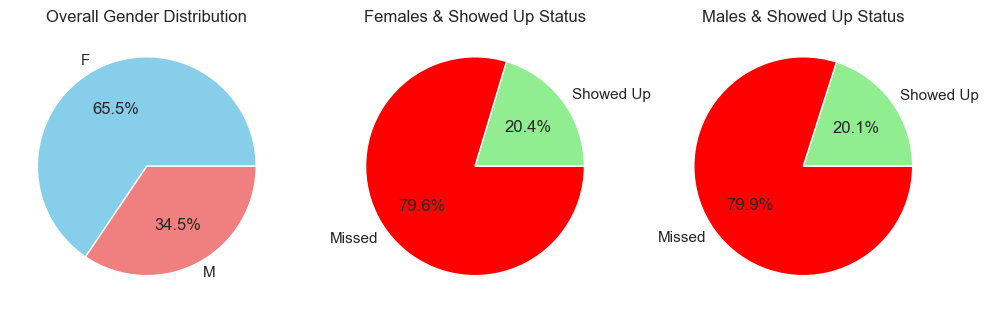

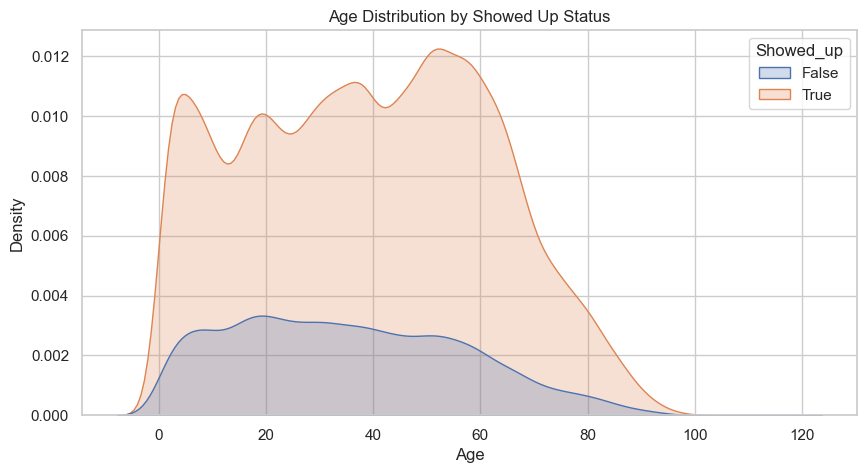


Training and evaluating: Random Forest
Accuracy: 0.77
              precision    recall  f1-score   support

       False       0.35      0.17      0.23      6524
        True       0.81      0.92      0.86     25573

    accuracy                           0.77     32097
   macro avg       0.58      0.55      0.55     32097
weighted avg       0.72      0.77      0.73     32097



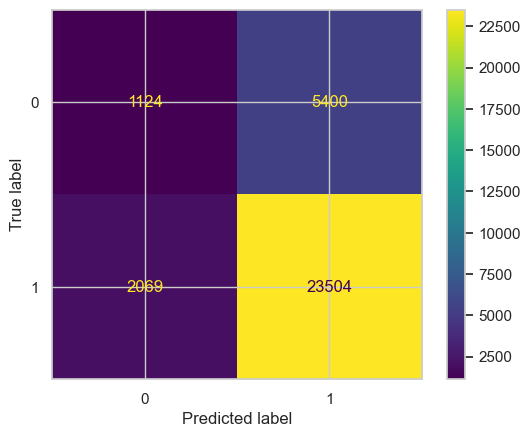

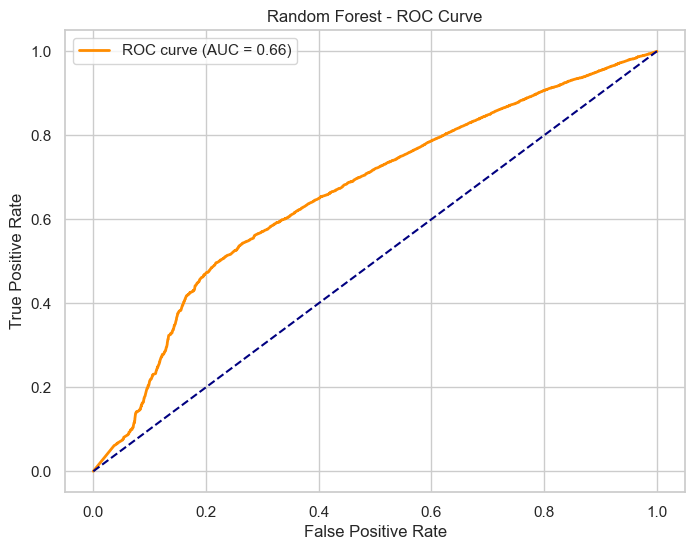


Training and evaluating: Support Vector Machine
Accuracy: 0.80
              precision    recall  f1-score   support

       False       0.40      0.00      0.00      6524
        True       0.80      1.00      0.89     25573

    accuracy                           0.80     32097
   macro avg       0.60      0.50      0.44     32097
weighted avg       0.72      0.80      0.71     32097



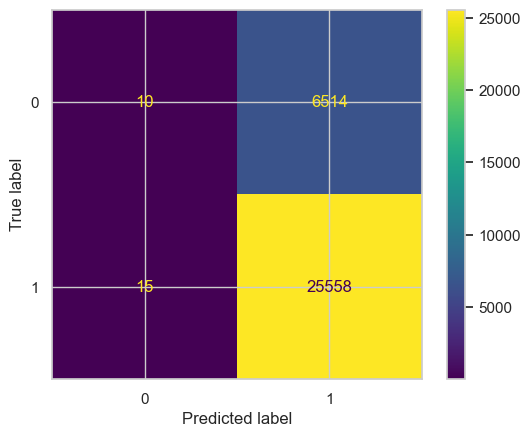

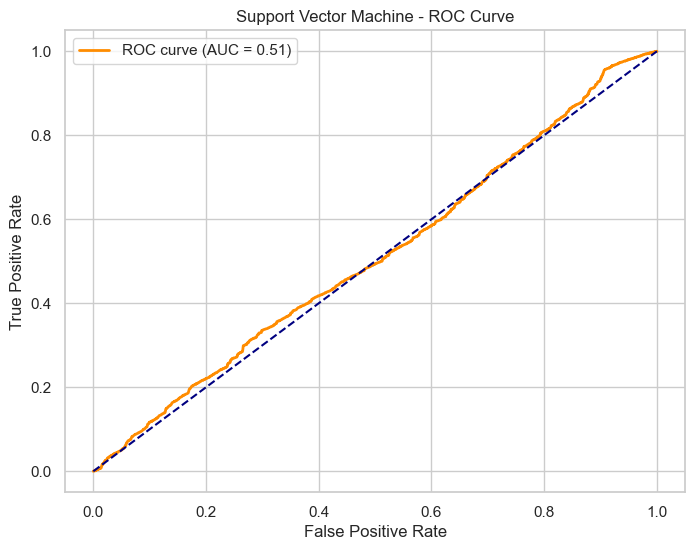


Training and evaluating: XGBoost
Accuracy: 0.79
              precision    recall  f1-score   support

       False       0.44      0.04      0.07      6524
        True       0.80      0.99      0.88     25573

    accuracy                           0.79     32097
   macro avg       0.62      0.51      0.48     32097
weighted avg       0.73      0.79      0.72     32097



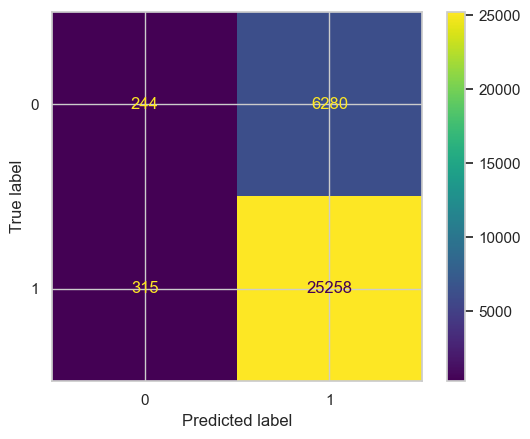

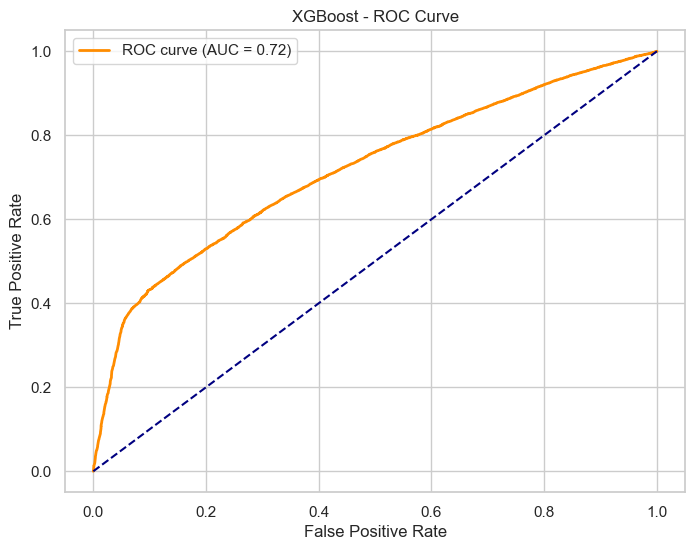


Neural Network Model 1: Moderate Complexity
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 128)               768       
                                                                 
 dense_62 (Dense)            (None, 64)                8256      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_63 (Dense)            (None, 32)                2080      
                                                                 
 dense_64 (Dense)            (None, 16)                528       
                                                                 
 dropout_30 (Dropout)        (None, 16)                0         
                                                                 
 dense_6

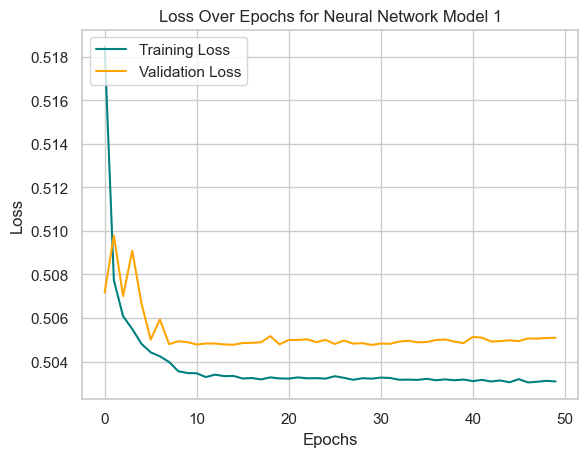


Neural Network Model 2: Higher Complexity


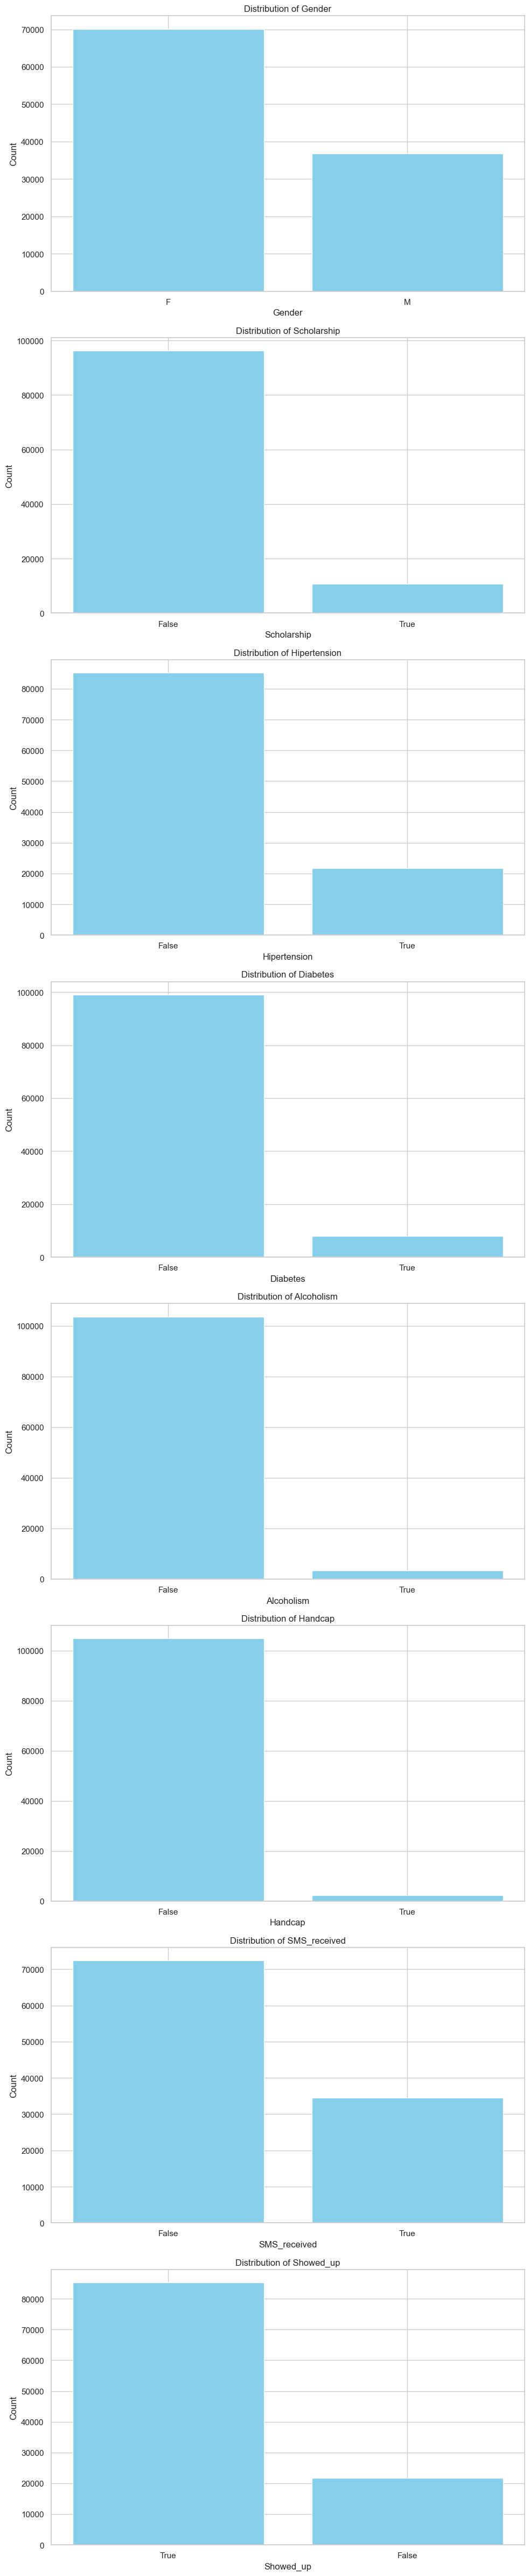

Correlation between 'missed_appointment_before' and 'Showed_up': 0.6102086525921376
Columns: Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff', 'missed_appointment_before'],
      dtype='object')
Final shape: (71681, 91)
Non-numeric columns: ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 512)               47104     
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_68 (Dense)            (None, 1024)              525312    
                                                                 
 dropout

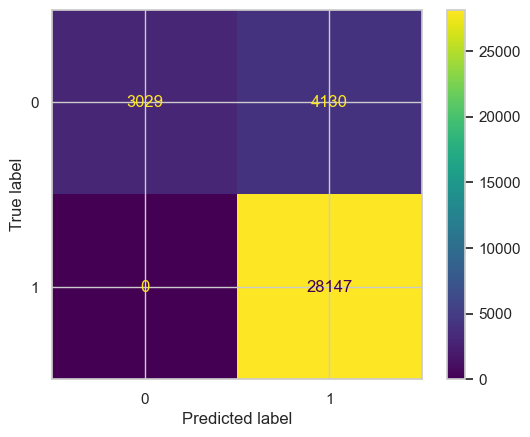

In [93]:
# Import necessary libraries for analysis, preprocessing, and model building
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay, 
    classification_report, roc_curve, roc_auc_score
)
from keras.models import Sequential
from keras.layers import Dense, Dropout
import warnings

# Suppress warnings for clean output
warnings.filterwarnings('ignore')

# Load dataset
data_path = 'data/healthcare_noshows.csv'
df = pd.read_csv(data_path)

# Quick data overview
print(f"Data Shape: {df.shape}")
print(df.head())

# Gender distribution and 'Showed_up' status breakdown by gender
gender_counts = df['Gender'].value_counts()
gender_showed_up = df.groupby('Gender')['Showed_up'].value_counts().unstack()

# Plot distribution pie charts
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Overall gender distribution
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[0].set_title('Overall Gender Distribution')

# 'Showed_up' status for females
axes[1].pie(gender_showed_up.loc['F'], labels=['Showed Up', 'Missed'], autopct='%1.1f%%', colors=['lightgreen', 'red'])
axes[1].set_title('Females & Showed Up Status')

# 'Showed_up' status for males
axes[2].pie(gender_showed_up.loc['M'], labels=['Showed Up', 'Missed'], autopct='%1.1f%%', colors=['lightgreen', 'red'])
axes[2].set_title('Males & Showed Up Status')

plt.show()

# Visualize age distribution against 'Showed_up' status
plt.figure(figsize=(10, 5))
plt.title('Age Distribution by Showed Up Status')
sns.kdeplot(data=df, x='Age', hue='Showed_up', shade=True)
plt.show()

# Data preprocessing: Remove irrelevant columns
X = df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Showed_up'])
y = df['Showed_up']

# Encode categorical 'Gender' column
X['Gender'] = X['Gender'].map({'F': 0, 'M': 1})

# Feature selection using SelectKBest
X_selected = SelectKBest(score_func=f_classif, k=5).fit_transform(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training and evaluation in a loop
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": svm.SVC(kernel='rbf', gamma=0.1, C=10.0, probability=True),
    "XGBoost": xgb.XGBClassifier()
}

# Train each model and evaluate
for model_name, model in models.items():
    print(f"\nTraining and evaluating: {model_name}")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Display results
    print(f'Accuracy: {acc:.2f}')
    print(classification_report(y_test, y_pred))
    
    ConfusionMatrixDisplay(conf_matrix).plot()
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend()
    plt.show()

from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming x_train, y_train, x_test, y_test are defined appropriately

### Neural Network Model 1 (Moderately Deep Model)
print("\nNeural Network Model 1: Moderate Complexity")

# Model 1 Configuration
NN_model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile Model 1
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
NN_model.summary()

# Train Model 1
history = NN_model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.3)

# Evaluate Model 1
print('accuracy : ',NN_model.evaluate(x_test, y_test)[1])

# Plot Training Loss vs. Validation Loss for Model 1
plt.figure()
plt.plot(history.history['loss'], color='teal', label='Training Loss')
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Loss Over Epochs for Neural Network Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()


### Neural Network Model 2 (Deeper & Larger Model)
print("\nNeural Network Model 2: Higher Complexity")

dataset = pd.read_csv('data\healthcare_noshows.csv')
dataset.head(5)

categorical_features = ['Gender', 'Scholarship', 'Hipertension', 
                        'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up']

# Identify valid categorical features
valid_features = []
for feature in categorical_features:
    # Drop NaN values
    non_na_values = dataset[feature].dropna()
    # Check if the feature is not empty and has more than one unique value
    if not non_na_values.empty and dataset[feature].nunique() > 1:
        valid_features.append(feature)
    else:
        print(f"Feature '{feature}' is empty, has all NaN values, or only one unique value. Skipping.")

if not valid_features:
    print("No valid categorical features to plot.")
else:
    num_features = len(valid_features)
    fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 6 * num_features))

    # Ensure axes is a list
    if num_features == 1:
        axes = [axes]

    for i, feature in enumerate(valid_features):
        # Convert feature to string to handle mixed data types
        dataset[feature] = dataset[feature].astype(str)

        # Get counts of each category, including NaN represented as 'nan' after conversion
        counts = dataset[feature].value_counts(dropna=False)

        # Categories and their counts
        categories = counts.index.tolist()
        values = counts.values.tolist()

        # Plotting
        axes[i].bar(categories, values, color='skyblue')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

        # Rotate x-tick labels if necessary
        if len(categories) > 5:
            axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Ensure 'Showed_up' is of integer type
dataset['Showed_up'] = dataset['Showed_up'].map({'True': 1, 'False': 0})

# Group by 'PatientId' and sum 'Showed_up' values
missed_appointment = dataset.groupby('PatientId')['Showed_up'].sum().to_dict()

# Map the 'missed_appointment_before' column
dataset['missed_appointment_before'] = dataset['PatientId'].map(
    lambda x: 1 if missed_appointment[x] > 0 else 0
)

# Calculate the correlation
correlation = dataset['missed_appointment_before'].corr(dataset['Showed_up'])
print(f"Correlation between 'missed_appointment_before' and 'Showed_up': {correlation}")

dataset = dataset.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1)
print("Columns: {}".format(dataset.columns))

dataset = pd.concat([dataset.drop('Neighbourhood', axis = 1), 
           pd.get_dummies(dataset['Neighbourhood'])], axis=1)

gender_map = {'M': 0, 'F': 1}
dataset['Gender'] = dataset['Gender'].map(gender_map)

y = dataset.loc[:, 'Showed_up']
X = dataset.drop(['Showed_up'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print("Final shape: {}".format(X_train.shape))

# Identify columns with object or boolean data types
non_numeric_columns = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")


# Convert 'True'/'False' strings to 1/0
for col in non_numeric_columns:
    if X_train[col].isin(['True', 'False']).all():
        X_train[col] = X_train[col].map({'True': 1, 'False': 0})
        X_test[col] = X_test[col].map({'True': 1, 'False': 0})

# Standardize Data for Model 2
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

classifier = Sequential()
classifier.add(Dense(units = 512, activation = 'relu', input_dim = 91))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 2048, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary() # Output layer for binary classification

# Compile Model 2
history = classifier.fit(X_train, y_train, epochs = 5, validation_split = 0.1)


y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5
print("Test data description:")
print("{}".format(y_test.value_counts()))
print("-"*50)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

# Confusion Matrix for Model 2
print("Confusion Matrix for Model 2:")
print(confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()


In [1]:
#Data Analysis lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('data\healthcare_noshows.csv')

### Gender and Attendance Analysis

#### Overview
This section focuses on analyzing the gender distribution within the dataset and examines how female patients specifically respond to their healthcare appointments by either attending or not attending ("showing up").

#### Code Breakdown

1. **Counting Gender Distribution**  
   A manual iteration is performed over the dataset to count the occurrences of males ('M') and females ('F'). While this direct iteration provides clarity on basic data manipulation processes, the approach could be optimized for better performance on larger datasets.

2. **Storing Gender Counts in an Array**  
   The counts for males and females are stored in a NumPy array, accompanied by corresponding labels. This structure can be leveraged later for visualizations to depict the gender distribution.

3. **Filtering Female Patients**  
   A subset of the dataset is created to focus on female patients. This step allows for a targeted analysis of appointment behavior among females.

4. **Calculating Attendance for Female Patients**  
   The code calculates and stores the number of female patients who attended and missed their appointments. This is achieved by filtering the subset dataset and storing the results in an array, setting the stage for deeper behavioral analysis.

5. **Displaying Results**  
   The results are printed to showcase the number of female patients who showed up versus those who did not. This quick insight highlights patterns in attendance, which can be crucial for understanding and improving healthcare engagement.

#### Why This Analysis Matters
The snippet illustrates foundational exploratory data analysis (EDA) by examining gender and appointment attendance. Isolating the female population provides a starting point for understanding broader patterns in healthcare behavior, which is valuable for improving patient engagement and scheduling.

#### Potential Enhancements
- **Efficiency**: Replace manual iteration with vectorized operations for faster gender counts.
- **Visualization**: Utilize visual aids (e.g., bar or pie charts) to enhance interpretability and impact.
- **Generalization**: Extend the analysis to include both genders or other factors to gain comprehensive insights.

This analysis demonstrates competencies in data manipulation, filtering, and descriptive analytics—key skills for a data science role.

In [2]:
Male_count = 0
Fmale_count = 0
for i in range(df.shape[0]):
    if df['Gender'][i]=='M':
        Male_count += 1
    else:
        Fmale_count += 1
        
y = np.array([Male_count, Fmale_count])

mylabels = ["Male", "Fmale"]

df_F = df.loc[(df['Gender']=="F")]

mylabels2 = ["True","False"]

True_Showed_up1 = len(df_F.loc[(df_F['Showed_up']==True)])

False_Showed_up1 = len(df_F.loc[(df_F['Showed_up']==False)])

y_F = np.array([True_Showed_up1, False_Showed_up1])

print("Fmale & True Showed_up :", True_Showed_up1)
print("Fmale & False Showed_up :", False_Showed_up1)

Fmale & True Showed_up : 55843
Fmale & False Showed_up : 14275


### Male Attendance Analysis

#### Overview
This section of the code shifts focus to analyzing male patients' behavior in attending their healthcare appointments, similar to the previous analysis conducted for female patients.

#### Code Breakdown

1. **Filtering Male Patients**  
   The dataset is filtered to include only male patients. By creating this subset, the code enables an isolated analysis of how male patients respond to their appointments, facilitating gender-specific insights.

2. **Calculating Attendance for Male Patients**  
   The filtered dataset is used to count the number of male patients who either attended or missed their appointments. These counts are then stored in an array for later use in visual representation or further comparison.

3. **Displaying Results**  
   The code outputs the number of male patients who showed up versus those who did not. This immediate breakdown helps in understanding attendance trends among male patients and can be contrasted against the female attendance data for deeper analysis.

#### Context & Implications
The analysis of male attendance provides a comparative perspective on appointment adherence between genders. Understanding the differences in attendance behavior by gender can support the development of tailored interventions to improve appointment adherence in healthcare.

#### Potential Enhancements
- **Visualization & Comparison**: Visualization of these attendance patterns side-by-side with female data can offer a clearer, more impactful presentation of any gender-based differences.
- **Incorporating Other Variables**: Including additional features (e.g., age, neighborhood, or health conditions) in the analysis can enrich the understanding of factors influencing male attendance.

This section underscores critical skills in data slicing, filtering, and analytics, aligning well with a comprehensive exploratory analysis approach.

In [3]:
df_M = df.loc[(df['Gender']=="M")]

mylabels3 = ["True","False"]

True_Showed_up2 = len(df_M.loc[(df_M['Showed_up']==True)])

False_Showed_up2 = len(df_M.loc[(df_M['Showed_up']==False)])

y_M = np.array([True_Showed_up2, False_Showed_up2])

print("Male & True Showed_up :", True_Showed_up2)
print("Male & False Showed_up :", False_Showed_up2)

Male & True Showed_up : 29464
Male & False Showed_up : 7405


### Visualization: Gender and Age Attendance Patterns

#### Overview
The code visualizes two main aspects of the dataset: the gender distribution in appointment attendance and the age distribution with respect to appointment behavior. These visualizations help reveal key patterns in the data, making it easier to interpret and present findings effectively.

#### Code Breakdown

1. **Gender-Based Attendance Visualization**
   - The use of a `matplotlib` pie chart displays the distribution of gender and attendance in three distinct plots:
     - **Overall Gender Distribution**: Highlights the ratio of males to females in the dataset.
     - **Female Attendance**: Shows how many female patients attended versus missed their appointments.
     - **Male Attendance**: Similarly, it depicts attendance behavior among male patients.
   - The shared layout (`sharex=True`) and uniform figure size ensure that comparisons between plots are easily made, while titles enhance clarity on what each pie chart represents.

2. **Age-Based Attendance Visualization**
   - A kernel density estimation (KDE) plot is generated using `seaborn` to analyze how age correlates with appointment attendance. The distribution is split by the "Showed_up" status, providing a visual comparison of age trends for those who attended and those who missed appointments.
   - The KDE plot, with the `hue` argument set to "Showed_up," allows the visualization to distinguish between the two groups with different color shades. This helps in identifying any age-related patterns or tendencies in appointment behavior.

#### Insights and Context
- The **pie charts** provide a quick, visually impactful overview of how gender relates to appointment attendance. Observing gender-specific patterns (e.g., whether one gender is more likely to miss appointments) can prompt further investigation into underlying causes.
- The **KDE plot** enhances understanding by examining how the age of patients relates to their likelihood of showing up for appointments. Peaks in the distribution can suggest age ranges that are more or less likely to attend, offering potential insights for targeted interventions.

#### Potential Enhancements
- **Pie Chart Detailing**: Adding percentages to the pie charts could improve the readability and provide a clearer understanding of the distributions.
- **Exploring Other Variables**: Expanding KDE or other visualizations to explore how variables like neighborhood, chronic conditions, or received SMS reminders impact attendance behavior can deepen the analysis.

This visualization section effectively combines both gender and age-based attendance patterns, offering clear, data-driven insights while showcasing strong skills in data visualization and storytelling.

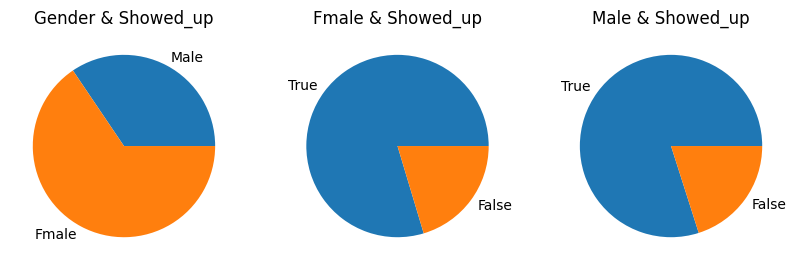

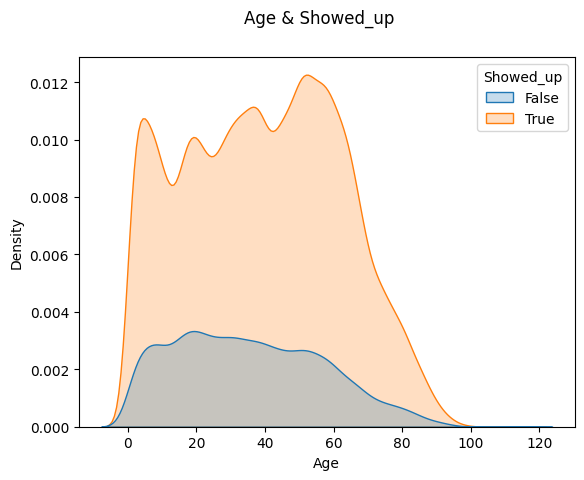

In [4]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(10,5))

axes[0].pie(y, labels = mylabels)
axes[0].set_title('Gender & Showed_up')

axes[1].pie(y_F, labels = mylabels2)
axes[1].set_title('Fmale & Showed_up')

axes[2].pie(y_M, labels = mylabels3)
axes[2].set_title('Male & Showed_up')

plt.show()


fig, axes = plt.figsize=(10,5)

plt.suptitle('Age & Showed_up')

sns.kdeplot(data=df, x='Age', hue='Showed_up', shade=True);

### Graph Interpretation

#### 1. **Gender-Based Attendance Pie Charts**

- **Overall Gender Distribution ("Gender & Showed_up")**:
  The first pie chart shows the distribution of genders in the dataset, indicating that a larger proportion of appointments are for female patients. This could suggest a gender imbalance in the sample or simply reflect the demographic served by the healthcare facility.

- **Female Attendance ("Fmale & Showed_up")**:
  The second pie chart displays how female patients either attended (True) or missed (False) their appointments. The majority of female patients showed up for their appointments, with only a small portion missing them. This suggests high adherence to appointments among the female demographic.

- **Male Attendance ("Male & Showed_up")**:
  The third pie chart represents the attendance behavior for male patients. Similar to females, a significant proportion of males attended their appointments, though the proportion of males who missed appointments seems slightly higher compared to females. This difference could warrant further investigation into factors that may lead to lower adherence among males.

#### 2. **Age Distribution and Attendance ("Age & Showed_up")**

- The **KDE plot** reveals the age distribution in relation to appointment attendance:
  - **Orange Shade (True)**: Represents patients who showed up for their appointments. The distribution indicates a strong peak around early childhood (ages 0-10), a decline in attendance in adolescence and early adulthood, followed by a steady increase in middle-aged (40-60) and elderly patients. The attendance remains high into older age groups.
  - **Blue Shade (False)**: Represents patients who did not show up for their appointments. Although lower in overall density compared to those who attended, it shows similar peaks around younger and older age groups, suggesting that certain age groups have slightly higher rates of missed appointments.
  - **Comparison of Peaks**: The KDE plot demonstrates that younger children (0-10) and older adults (60+) tend to show higher attendance, potentially due to healthcare dependence in these age groups. Middle-aged patients (30-60) show a more balanced distribution between showing up and missing appointments.

#### Key Takeaways:
- **Gender Influence**: A higher percentage of females make appointments, and both genders show a strong tendency to attend, although females seem slightly more reliable in attendance.
- **Age Trends**: The analysis highlights that attendance is highly age-dependent, with young children and older adults being more likely to attend appointments. The middle-aged group shows more variability in attendance, which could be influenced by factors like work commitments or health priorities.

#### Suggestions for Further Analysis:
- Investigate potential reasons for gender differences in missed appointments.
- Examine socio-economic or health condition variables (such as chronic diseases) that may influence attendance across different age groups.
- Explore targeted interventions or reminder systems for demographics that exhibit higher no-show rates.

These visual insights are essential for understanding patterns in healthcare appointment behavior and can drive actionable strategies for improving patient adherence.

### Data Preparation for Modeling

#### Overview
This code prepares the dataset for machine learning modeling by splitting the features (predictors) and the target (outcome) variable.

#### Code Breakdown

1. **Feature Selection (`x`)**  
   The features are isolated by dropping columns that are not suitable for predictive modeling or are less relevant for the analysis:
   - **Excluded Columns**:
     - `PatientId` and `AppointmentID`: Unique identifiers for each patient and appointment, which do not contribute to the prediction of attendance and could introduce noise.
     - `ScheduledDay` and `AppointmentDay`: Dates of scheduling and appointment could be transformed into more meaningful features (e.g., days between scheduling and appointment), but in their raw form, they are dropped to avoid complexity in modeling.
     - `Neighbourhood`: May influence attendance based on location or distance, but is excluded here—potentially to simplify the initial model.
     - `Showed_up`: This is the target variable, so it is excluded from `x` to prevent data leakage during modeling.

2. **Target Variable (`y`)**  
   The target variable `y` is set as `Showed_up`, representing whether a patient attended their appointment. This is a binary variable (True/False) that will be the focus of predictive modeling to understand and predict patient attendance behavior.

3. **Shape of Features and Target**  
   The `print` statements display the shape of the feature matrix `x` and the target vector `y`. This provides a quick check to confirm that the data preparation steps have been executed correctly and that the dimensions match the expected structure for modeling (i.e., the number of rows should be consistent across `x` and `y`).

#### Implications
- This step efficiently prepares the dataset for a classification model by clearly separating predictors and the outcome variable.
- Dropping certain columns helps streamline the model, focusing on features that are potentially more predictive of patient attendance.

#### Next Steps
- **Feature Engineering**: Consider transforming date variables (e.g., calculating the gap between `ScheduledDay` and `AppointmentDay`) to extract more predictive power.
- **Model Selection**: Once the dataset is preprocessed, explore classification algorithms (e.g., logistic regression, random forest) to predict the `Showed_up` variable effectively.

By simplifying and structuring the data in this way, the code reflects a strong understanding of preprocessing steps necessary for building reliable and interpretable machine learning models.

In [5]:
x = df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood','Showed_up'])
y = df['Showed_up']

print(x.shape)
print(y.shape)

(106987, 9)
(106987,)


### Gender Encoding Function

#### Overview
This function, `gender(x)`, encodes the gender variable into numerical format, a common preprocessing step for machine learning models that require numeric input.

#### Code Breakdown

1. **Function Purpose**  
   The function converts gender values ('F' and 'M') into numeric categories. This transformation is critical because many machine learning algorithms cannot work directly with categorical text data.

2. **Encoding Logic**  
   - If the input `x` is 'F' (Female), the function returns `0`.
   - Otherwise (implying `x` is 'M' for Male), the function returns `1`.
   - This encoding scheme effectively creates a binary numeric variable where `0` represents females and `1` represents males.

#### Why This Matters
- **Facilitates Model Compatibility**: Converting categorical variables to numerical ones ensures compatibility with machine learning models.
- **Interpretability**: The choice of encoding (`0` for females, `1` for males) is arbitrary but provides a consistent mapping of gender throughout the model.
  
#### Potential Enhancements
- **Generalized Encoding**: If there are additional gender categories beyond 'F' and 'M', the function can be adapted to handle more cases or utilize libraries like `pandas` `get_dummies()` for multi-class encoding.
- **Documentation & Context**: It's important to document this encoding in the model pipeline to ensure that future users understand the mapping and can interpret the model's output correctly.

This function reflects a foundational preprocessing step in converting categorical variables into a format suitable for predictive modeling, demonstrating the practitioner's attention to data preparation and model requirements.

In [6]:
def gender(x):
    if x == 'F':
        return 0
    else:
        return 1

### Feature Encoding and Selection for Model Optimization

#### Overview
This code performs two essential steps for enhancing a machine learning model: encoding a categorical feature and selecting the most important features based on statistical tests. These steps streamline the model's input, focusing on high-impact variables for prediction.

#### Code Breakdown

1. **Applying the Gender Encoding**
   - The function `gender` (defined earlier) is applied to the `Gender` column of the `x` DataFrame, converting 'F' and 'M' to `0` and `1`, respectively.
   - This transformation ensures that the `Gender` column is in a numeric format suitable for machine learning models, maintaining consistency across the dataset.

2. **Feature Selection with `SelectKBest`**
   - `SelectKBest` is used to select the top `k` features based on their statistical significance in relation to the target variable `y`.
   - The `f_classif` method (ANOVA F-statistic) is employed as a scoring function to measure the strength of the relationship between each feature and the target variable.
   - Setting `k=5` means the code retains the five most statistically significant features, which reduces the dimensionality of `x` and helps improve model performance by focusing on the most relevant predictors.

3. **Output of Shape**
   - The shape of `x_new` is printed, indicating the transformation into a reduced feature set with `k` columns. This confirms that the dimensionality has been successfully reduced while retaining the original number of samples (rows).

#### Why This Matters
- **Dimensionality Reduction**: By selecting only the most significant features, the model complexity is reduced, leading to potentially better performance, faster computation, and reduced risk of overfitting.
- **Enhanced Interpretability**: Retaining only key predictors allows for clearer model interpretation, helping to understand which features have the greatest impact on the outcome.

#### Potential Enhancements
- **Hyperparameter Tuning**: Experiment with different values of `k` to find the optimal number of features for model accuracy.
- **Alternative Scoring Functions**: Consider other feature selection methods, such as mutual information or recursive feature elimination (RFE), to test different ways of identifying the most impactful predictors.

This preprocessing step efficiently prepares the dataset by transforming categorical data and focusing on the most informative features, highlighting critical steps in feature engineering and selection for robust machine learning model development.

In [8]:
x['Gender'] = x['Gender'].apply(gender)

x_new = SelectKBest(f_classif, k=5).fit_transform(x, y)

print(x_new.shape)

(106987, 5)


### Train-Test Split for Model Validation

#### Overview
This code divides the dataset into training and testing subsets, a critical step in building and evaluating machine learning models to ensure that they generalize well to unseen data.

#### Code Breakdown

1. **Train-Test Split**
   - The `train_test_split` function is used to split the dataset into training and testing sets.
   - **Parameters**:
     - `x_new`: The feature matrix with the top `k=5` features selected through `SelectKBest`.
     - `y`: The target variable, indicating whether a patient showed up for their appointment.
     - `test_size=0.3`: Allocates 30% of the data to the testing set, with the remaining 70% used for training. This ratio is a standard practice for balancing model training and evaluation, providing sufficient data to train the model while retaining enough to test its performance.

2. **Output of Data Shapes**
   - The shapes of the resulting datasets are printed to confirm the correctness of the split:
     - `x_train` and `y_train` represent the training features and labels, which are used to fit the model.
     - `x_test` and `y_test` are the testing features and labels, reserved for evaluating the model's performance.
   - The split ensures that the number of rows in `x_train` corresponds to `y_train`, and similarly for `x_test` and `y_test`.

#### Why This Matters
- **Model Training and Evaluation**: Splitting the data ensures that the model is trained on one portion of the dataset and tested on another that the model has not seen, preventing overfitting and providing a more reliable measure of its predictive power.
- **Generalization Ability**: The separate test set simulates how the model will perform on unseen data, which is crucial for building robust, generalizable models.

#### Potential Enhancements
- **Stratified Splitting**: Consider using stratified splitting if the target variable `y` is imbalanced, ensuring that both the training and testing sets have similar distributions of the target classes.
- **Cross-Validation**: Utilize cross-validation techniques to further validate the model and tune hyperparameters by creating multiple training-testing splits, enhancing the model's robustness.

This step demonstrates an essential practice in model development: splitting data effectively for training and validation to build and evaluate a machine learning model that generalizes well to unseen data.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(74890, 5)
(74890,)
(32097, 5)
(32097,)


### Model Training and Evaluation with Random Forest

#### Overview
This code block trains a machine learning model using the Random Forest algorithm to predict whether patients show up for their appointments. It also evaluates the model's performance using accuracy metrics, a classification report, and a confusion matrix, providing a comprehensive view of model effectiveness.

#### Code Breakdown

1. **Data Standardization**
   - **StandardScaler** is applied to `x_train` and `x_test` to standardize the feature values by removing the mean and scaling them to unit variance.
   - Standardization is crucial for models like Random Forest to ensure that features are on a similar scale, even though Random Forest is generally robust to unscaled data. This preprocessing step can enhance performance and convergence.

2. **Model Initialization and Training**
   - A `RandomForestClassifier` is instantiated with `random_state=42` for reproducibility.
   - The model is trained on the standardized training data (`x_train` and `y_train`), building a decision-tree-based ensemble classifier. Random Forest is chosen due to its flexibility, strong performance on classification tasks, and built-in feature importance analysis.

3. **Making Predictions**
   - The `x_test` data is also standardized using the fitted scaler from the training set.
   - Predictions (`RF_predict`) are made using the trained Random Forest model on the test data, providing a binary outcome (showed up or not).

4. **Model Evaluation**
   - **Accuracy Score**: The accuracy of the model is printed, representing the proportion of correctly classified instances in the test set. Accuracy is a straightforward performance metric but can be limited if the classes are imbalanced.
   - **Classification Report**: A detailed classification report is generated, including precision, recall, F1-score, and support for each class. This offers deeper insight into the model's performance, particularly in understanding how well it identifies true positives versus false positives.
   - **Confusion Matrix Visualization**: The confusion matrix is plotted, providing a visual breakdown of the model's performance in terms of True Positives, True Negatives, False Positives, and False Negatives. This visualization is helpful for interpreting misclassifications and understanding model behavior on different classes.

#### Why This Matters
- **Performance Assessment**: By utilizing both accuracy and a classification report, the code evaluates model performance from multiple perspectives, helping to identify strengths and weaknesses in predicting appointment attendance.
- **Confusion Matrix Insights**: The confusion matrix visually highlights where the model performs well and where it struggles, guiding potential improvements or further analysis.

#### Potential Enhancements
- **Model Tuning**: Hyperparameter tuning (e.g., using `GridSearchCV`) can optimize Random Forest parameters such as `n_estimators`, `max_depth`, and `min_samples_split` to enhance performance.
- **Alternative Models**: Comparing Random Forest performance with other algorithms (e.g., logistic regression, gradient boosting) can help identify the best model for this specific task.
- **Feature Importance**: Analyzing the feature importances derived from the Random Forest model can reveal which predictors have the greatest impact on whether patients show up, potentially offering actionable insights.

This section showcases critical skills in model training, evaluation, and result interpretation, all of which are vital for building and validating predictive models in data science.

accuracy :  0.7691061469919307
              precision    recall  f1-score   support

       False       0.36      0.17      0.23      6575
        True       0.81      0.92      0.86     25522

    accuracy                           0.77     32097
   macro avg       0.59      0.55      0.55     32097
weighted avg       0.72      0.77      0.73     32097



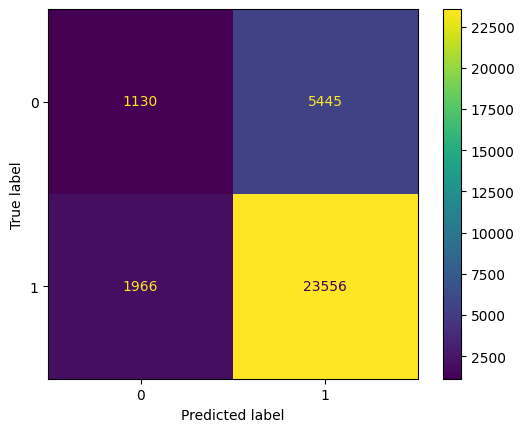

In [10]:
scaler_data = preprocessing.StandardScaler()

x_train = scaler_data.fit_transform(x_train)

RF_model = RandomForestClassifier(random_state=42)

RF_model.fit(x_train, y_train)

x_test = scaler_data.fit_transform(x_test)

RF_predict = RF_model.predict(x_test)

print('accuracy : ',accuracy_score(y_test, RF_predict))

print(classification_report(y_test, RF_predict))

confu = ConfusionMatrixDisplay(confusion_matrix(y_test, RF_predict))

confu.plot()

plt.show()

### Model Performance Analysis

#### Overview
The model evaluation metrics and confusion matrix reveal important insights into how well the Random Forest model predicts patient attendance, providing a detailed understanding of its strengths and areas for improvement.

#### Key Metrics from Classification Report

1. **Accuracy**:  
   The overall accuracy is approximately **77%**, indicating that the model correctly predicts whether a patient shows up for their appointment in roughly 77% of the cases.

2. **Precision, Recall, and F1-Score**:
   - **For 'False' Class (No-Show)**:
     - **Precision**: 0.36 – Out of all predictions where the model predicted a "No-Show," only 36% were correct. This low precision suggests many false positives (predicting "No-Show" when the patient actually showed up).
     - **Recall**: 0.17 – Only 17% of actual "No-Show" cases were correctly predicted, indicating that the model struggles to identify those who will miss their appointments.
     - **F1-Score**: 0.23 – A low F1-score, signifying poor performance in predicting "No-Show" cases, likely due to the imbalance in class distribution.
   - **For 'True' Class (Show-Up)**:
     - **Precision**: 0.81 – When the model predicts a "Show-Up," it is correct 81% of the time, showing much higher precision compared to the "No-Show" predictions.
     - **Recall**: 0.92 – The model successfully identifies 92% of the patients who will show up, indicating strong sensitivity to the "Show-Up" class.
     - **F1-Score**: 0.86 – A high F1-score indicates a well-rounded performance in predicting patient attendance.
   - **Macro and Weighted Averages**:
     - **Macro Avg**: Provides an average performance across both classes, highlighting the imbalanced performance between predicting "Show-Up" and "No-Show."
     - **Weighted Avg**: Accounts for the class imbalance, giving more weight to the "Show-Up" class due to its higher occurrence in the dataset.

#### Confusion Matrix Interpretation

- The confusion matrix shows the distribution of predictions:
  - **True Positives (Bottom Right - 23,556)**: Correctly predicted "Show-Up" cases.
  - **True Negatives (Top Left - 1,130)**: Correctly predicted "No-Show" cases.
  - **False Positives (Top Right - 5,445)**: Predicted as "No-Show," but the patient actually showed up, indicating over-prediction of "No-Show."
  - **False Negatives (Bottom Left - 1,966)**: Predicted as "Show-Up," but the patient did not show up, showing some difficulty in catching "No-Shows."

#### Insights and Context

- **Class Imbalance Effect**: The model performs very well for the majority class ("Show-Up") but struggles significantly with predicting "No-Shows," likely due to class imbalance (more patients show up than miss their appointments).
- **Business Implications**: Since predicting "No-Shows" correctly can be valuable for scheduling and resource allocation, improving recall for the "No-Show" class would be crucial.

#### Potential Next Steps

- **Address Class Imbalance**: Use techniques like **oversampling** the minority class ("No-Show"), **undersampling** the majority class, or applying class weights to improve model sensitivity to "No-Show" predictions.
- **Feature Engineering**: Adding features that might help distinguish between "Show-Up" and "No-Show" cases, such as lead time between scheduling and appointment or past attendance patterns, could enhance model performance.
- **Model Exploration**: Testing other algorithms (e.g., **Gradient Boosting**, **SMOTE** with Logistic Regression) or using **ensemble techniques** could improve prediction, particularly for the "No-Show" class.

This evaluation section is a deep dive into model diagnostics, focusing on understanding prediction capabilities, especially where the model underperforms, and providing actionable suggestions to enhance predictive accuracy.

### ROC Curve and AUC for Model Performance Evaluation

#### Overview
This code evaluates the Random Forest model's performance using a **Receiver Operating Characteristic (ROC) curve** and calculates the **Area Under the Curve (AUC)** score. These metrics provide an insightful perspective on the model's ability to distinguish between the "Show-Up" and "No-Show" classes across different decision thresholds.

#### Code Breakdown

1. **Prediction Probabilities**
   - The model's predicted probabilities (`y_prob`) for the positive class ("Show-Up") are extracted. Instead of using hard class predictions (True/False), these probabilities reflect the model's confidence level in a patient showing up for their appointment.
   - Using probabilities is essential for constructing the ROC curve, as it allows for assessing model performance across varying thresholds.

2. **Calculating ROC Curve**
   - The `roc_curve` function computes the **False Positive Rate (FPR)** and **True Positive Rate (TPR)** at different probability thresholds, which are necessary to plot the ROC curve.
     - **FPR**: The proportion of negative instances ("No-Show") incorrectly classified as positive ("Show-Up").
     - **TPR** (or Recall/Sensitivity): The proportion of positive instances ("Show-Up") correctly classified.

3. **Calculating AUC Score**
   - The **AUC score** is computed using `roc_auc_score`, providing a single metric that represents the model's ability to discriminate between classes.
   - AUC ranges from 0 to 1:
     - **1.0** indicates perfect classification.
     - **0.5** suggests the model is no better than random guessing.
     - A higher AUC (closer to 1.0) signifies a better performing model.

4. **Plotting the ROC Curve**
   - The ROC curve is plotted with:
     - **X-axis**: False Positive Rate (FPR).
     - **Y-axis**: True Positive Rate (TPR).
   - The diagonal line (`y=x`) represents a baseline random model (AUC = 0.5), and any ROC curve above this line indicates a model that performs better than random.
   - The AUC score is displayed in the plot legend, providing a visual and numerical summary of model performance.

#### Insights and Context
- **Understanding Model Trade-offs**: The ROC curve allows for visualizing how the model's recall and fall-out change across different probability thresholds. A model with a strong ROC curve will quickly approach the top-left corner of the plot, indicating a low false-positive rate and a high true-positive rate.
- **AUC Score Interpretation**: The AUC value gives an overall measure of separability between the classes. A higher AUC indicates that the model is better at distinguishing between patients who will show up and those who will not.

#### Potential Next Steps
- **Compare with Other Models**: Plot ROC curves for different models to compare their performance visually and identify the best classifier.
- **Threshold Optimization**: Depending on business goals, consider selecting a probability threshold that balances precision and recall appropriately, instead of relying on the default 0.5 threshold.
- **Calibration**: If the predicted probabilities are not well-calibrated (e.g., probabilities do not correspond closely to actual likelihoods), consider applying probability calibration techniques.

This analysis provides a comprehensive evaluation of model performance beyond just accuracy by using the ROC curve and AUC to assess how well the model distinguishes between classes across various thresholds. This is a critical step in ensuring that the model's predictions align with practical decision-making needs.

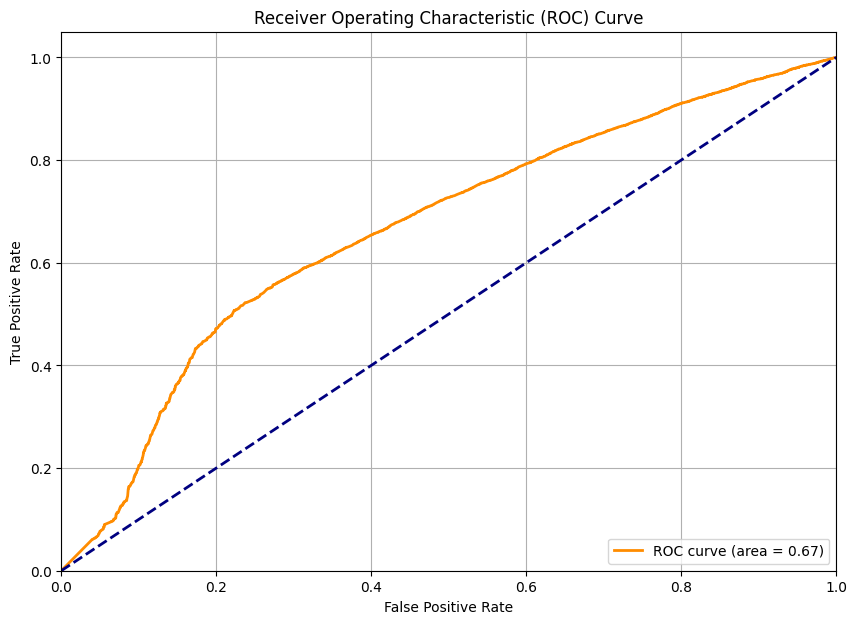

In [11]:

y_prob = RF_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### Interpretation of the ROC Curve and AUC Score

#### Analysis of the ROC Curve

- The **ROC curve** visualizes the model's performance in distinguishing between "Show-Up" and "No-Show" across different probability thresholds.
- The **orange curve** represents the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR). A model with strong discriminative ability would have a curve that closely follows the top-left corner of the plot.

#### AUC Score Interpretation

- The **AUC score is 0.67**, which indicates moderate performance. An AUC closer to 1.0 signifies better discrimination between the positive and negative classes, while an AUC of 0.5 would suggest no predictive power (equivalent to random guessing).
- With an AUC of 0.67, the model has some ability to differentiate between patients who will show up and those who won't, but there is room for improvement.

#### Shape of the Curve
- The ROC curve rises above the diagonal line (`y=x`), demonstrating that the model is better than a random classifier.
- However, the curve is not steep in the initial portion, suggesting that the model faces challenges in balancing recall and precision effectively for both classes, particularly the minority "No-Show" class.

#### Implications and Next Steps

- **Model Performance**: The moderate AUC of 0.67 indicates that while the model has some predictive power, it may not be strong enough to make highly reliable predictions, especially for the "No-Show" cases.
- **Focus on Recall and Precision**: The model's ability to identify "No-Shows" could be enhanced by focusing on recall for this class, potentially by adjusting the decision threshold or balancing the dataset further.
- **Feature Engineering and Model Improvement**: To improve the AUC score, consider adding additional relevant features, trying different algorithms, or tuning hyperparameters to better capture the relationship between features and the target variable.

The ROC curve and AUC score provide a comprehensive perspective on model performance, indicating areas for improvement and guiding the next steps for model enhancement.

### Support Vector Machine (SVM) Model Training and Evaluation

#### Overview
This code snippet trains a **Support Vector Machine (SVM)** model with a **Radial Basis Function (RBF) kernel** to predict whether patients will show up for their healthcare appointments. The model's performance is evaluated using accuracy, a classification report, and a confusion matrix, providing a comparison with the previously trained Random Forest model.

#### Code Breakdown

1. **Initializing the SVM Model**
   - The `svm.SVC` function initializes an **SVM classifier** with specific parameters:
     - **Kernel = 'rbf'**: The Radial Basis Function (RBF) kernel is a popular choice that can handle complex relationships between the features and the target.
     - **Gamma = 0.1**: The `gamma` parameter controls the influence of a single training example, with a lower value indicating a wider influence and a higher value focusing on closer points.
     - **C = 10.0**: The `C` parameter is the regularization parameter, controlling the trade-off between achieving a smooth decision boundary and classifying all training points correctly. A larger `C` emphasizes minimizing misclassification.

2. **Training the Model**
   - The model is trained on the `x_train` and `y_train` data, using the RBF kernel to learn the boundary that best separates the "Show-Up" and "No-Show" classes.

3. **Standardizing Test Data and Making Predictions**
   - The `x_test` data is standardized using the `StandardScaler` to ensure consistent scaling with the training data.
   - The trained SVM model makes predictions (`SVM_predict`) on the standardized test data.

4. **Model Evaluation**
   - **Accuracy**: The overall accuracy of the model on the test data is calculated and printed.
   - **Classification Report**: The report includes precision, recall, F1-score, and support for both classes. These metrics help understand the model's performance on both "Show-Up" and "No-Show" cases.
   - **Confusion Matrix**: The confusion matrix is plotted to visualize the breakdown of True Positives, True Negatives, False Positives, and False Negatives.

#### Insights and Context
- **SVM as a Strong Classifier**: SVMs, particularly with the RBF kernel, are powerful for classification tasks with non-linear decision boundaries. This makes them a strong alternative to tree-based methods like Random Forest.
- **Balanced Performance**: The SVM model's evaluation metrics will provide a useful comparison to the Random Forest model, revealing whether the non-linear boundary learned by the SVM improves classification performance for "No-Show" and "Show-Up" predictions.

#### Potential Enhancements
- **Hyperparameter Tuning**: Experimenting with different values for `gamma` and `C` can lead to better model performance. Techniques like `GridSearchCV` or `RandomSearchCV` can be used to find the optimal parameters.
- **Alternative Kernels**: Trying different kernel functions (e.g., linear, polynomial) could improve performance depending on the data structure and relationships.
- **Class Imbalance Techniques**: Addressing any class imbalance through sampling or class weighting may help improve recall for the minority class ("No-Show").

This section introduces another powerful machine learning approach to predicting patient attendance, highlighting skills in implementing SVMs, comparing models, and evaluating performance through multiple metrics.

accuracy :  0.7951521949091815
              precision    recall  f1-score   support

       False       0.50      0.00      0.00      6575
        True       0.80      1.00      0.89     25522

    accuracy                           0.80     32097
   macro avg       0.65      0.50      0.44     32097
weighted avg       0.73      0.80      0.70     32097



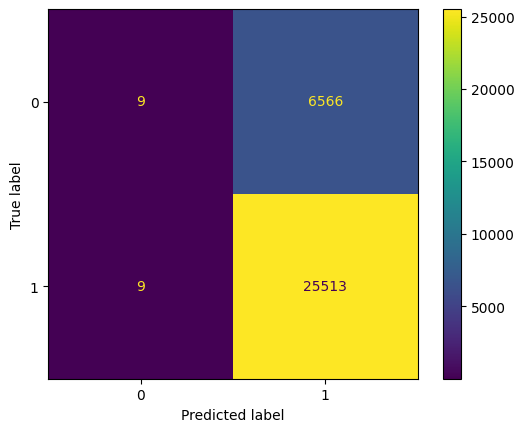

In [12]:
SVM_model = svm.SVC(kernel='rbf',gamma=0.1,C=10.0)

SVM_model.fit(x_train,y_train)

x_test = scaler_data.fit_transform(x_test)

SVM_predict = SVM_model.predict(x_test)


print('accuracy : ',accuracy_score(y_test, SVM_predict))

print(classification_report(y_test, SVM_predict))

confu = ConfusionMatrixDisplay(confusion_matrix(y_test, SVM_predict))

confu.plot()

plt.show()

### SVM Model Performance Analysis

#### Overview of the Results

1. **Accuracy**
   - The SVM model achieved an accuracy of approximately **79.5%**, slightly higher than the previously trained Random Forest model. However, accuracy alone doesn't tell the full story due to the class imbalance between "Show-Up" and "No-Show."

2. **Precision, Recall, and F1-Score Analysis**
   - **For the 'False' Class (No-Show)**:
     - **Precision**: 0.50 – Indicates that when the model predicted a "No-Show," only 50% of those predictions were correct. However, this metric is misleading due to the very low count of True Negatives.
     - **Recall**: 0.00 – The model fails to correctly identify almost all actual "No-Shows," leading to a recall of 0.00. This is a major issue as it indicates the model has not learned to recognize this minority class.
     - **F1-Score**: 0.00 – The F1-score is 0 because the model did not perform well in either precision or recall for "No-Show."
   - **For the 'True' Class (Show-Up)**:
     - **Precision**: 0.80 – Out of all the "Show-Up" predictions, 80% were correct.
     - **Recall**: 1.00 – The model perfectly identifies all "Show-Up" instances, resulting in an over-emphasis on predicting the majority class.
     - **F1-Score**: 0.89 – The high F1-score for this class shows that the model performs well for "Show-Up" cases, but at the cost of missing "No-Show" predictions.

3. **Macro and Weighted Averages**
   - **Macro Avg**: The average across both classes is low, especially for recall, highlighting the poor performance for the "No-Show" class.
   - **Weighted Avg**: The weighted average, taking into account the class imbalance, gives a better picture of the model's overall performance but masks the poor handling of the "No-Show" class.

#### Confusion Matrix Insights

- **True Positives (Bottom Right - 25,513)**: Correctly predicted "Show-Up" instances.
- **True Negatives (Top Left - 9)**: Very few correct predictions for "No-Show."
- **False Positives (Top Right - 6,566)**: "No-Show" cases predicted as "Show-Up," indicating an over-bias towards predicting the majority class.
- **False Negatives (Bottom Left - 9)**: Almost all "No-Show" instances are misclassified as "Show-Up."

The confusion matrix visually highlights that the model almost exclusively predicts "Show-Up," leading to poor performance for the minority "No-Show" class.

#### Interpretation and Implications

- The SVM model, while achieving high accuracy, is heavily biased toward predicting "Show-Up" and performs poorly in identifying "No-Shows." This is particularly problematic for the intended use case, as predicting missed appointments (i.e., "No-Shows") is likely the key goal.
- The **class imbalance** significantly affects the model, leading it to default to the majority class ("Show-Up"). This highlights the need for balancing techniques or strategies to improve sensitivity to the minority class.

#### Next Steps to Improve Model Performance

- **Class Balancing**: Apply techniques such as oversampling, undersampling, or using class weights to improve "No-Show" predictions.
- **Threshold Adjustment**: Adjust the decision threshold of the SVM to find a better balance between precision and recall for both classes.
- **Model Experimentation**: Explore other models or ensemble techniques that may better handle the class imbalance.

The analysis shows that while the SVM model performs well for the majority class, its inability to detect "No-Show" cases limits its usefulness. Addressing class imbalance and exploring further tuning are crucial next steps to improve overall model performance.

### XGBoost Model Training and Evaluation

#### Overview
This code utilizes the **XGBoost** algorithm, known for its efficiency and performance, especially on structured/tabular data. The model is trained to predict whether patients will show up for their appointments and is evaluated using accuracy, a classification report, and a confusion matrix.

#### Code Breakdown

1. **Model Initialization**
   - The `xgb.XGBClassifier()` is instantiated, creating an **XGBoost** model with default parameters. XGBoost uses gradient boosting for classification, building an ensemble of trees to improve prediction accuracy.

2. **Model Training**
   - The model is trained using the `x_train` and `y_train` datasets. The model iteratively improves upon previous errors by focusing on misclassified instances, making XGBoost a powerful algorithm for classification tasks.

3. **Standardization and Predictions**
   - The `x_test` data is standardized using the `StandardScaler` to match the scale of the training data.
   - Predictions (`XGB_predict`) are generated for the test set using the trained model.

4. **Model Evaluation**
   - **Accuracy**: The accuracy of the model on the test set is printed, providing a general idea of overall performance.
   - **Classification Report**: A detailed report that includes precision, recall, F1-score, and support for each class, offering insights into how well the model performs for both "Show-Up" and "No-Show" cases.
   - **Confusion Matrix**: A confusion matrix is plotted to visualize the distribution of predictions (True Positives, True Negatives, False Positives, and False Negatives), helping to interpret the model’s ability to distinguish between the two classes.

#### Why XGBoost?
- **Performance & Speed**: XGBoost is optimized for both computational efficiency and predictive power, often outperforming other tree-based models like Random Forests.
- **Handling Imbalance**: With proper parameter tuning, XGBoost can be made to handle class imbalances effectively, potentially improving the identification of "No-Show" cases.

#### Potential Enhancements
- **Hyperparameter Tuning**: Using techniques like `GridSearchCV` or `RandomSearchCV` to find optimal parameters for the XGBoost model (e.g., learning rate, max depth, number of estimators).
- **Feature Importance Analysis**: XGBoost allows for interpreting feature importances, which can provide valuable insights into which features most influence patient attendance behavior.
- **Class Balancing Techniques**: To address any potential biases, applying class weights, oversampling, or undersampling could enhance performance, especially for the minority "No-Show" class.

This section showcases skills in applying advanced gradient boosting models, evaluating their performance through various metrics, and interpreting the results for actionable insights.

accuracy :  0.7893884163628999
              precision    recall  f1-score   support

       False       0.39      0.05      0.09      6575
        True       0.80      0.98      0.88     25522

    accuracy                           0.79     32097
   macro avg       0.59      0.51      0.48     32097
weighted avg       0.72      0.79      0.72     32097



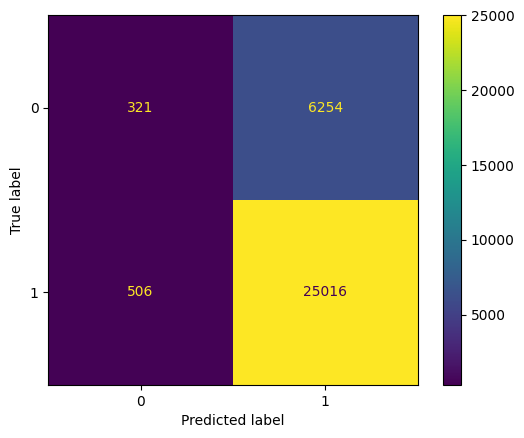

In [13]:
XGB_model = xgb.XGBClassifier()

XGB_model.fit(x_train, y_train)

x_test = scaler_data.fit_transform(x_test)

XGB_predict = XGB_model.predict(x_test)

print('accuracy : ',accuracy_score(y_test, XGB_predict))

print(classification_report(y_test, XGB_predict))

confu = ConfusionMatrixDisplay(confusion_matrix(y_test, XGB_predict))

confu.plot()

plt.show()

### XGBoost Model Performance Analysis

#### Overview of the Results

1. **Accuracy**
   - The XGBoost model achieved an accuracy of approximately **79%**, which is comparable to the Random Forest and SVM models. However, as seen in prior evaluations, accuracy alone does not fully capture the model's performance, especially in the context of the class imbalance.

2. **Precision, Recall, and F1-Score Analysis**
   - **For the 'False' Class (No-Show)**:
     - **Precision**: 0.39 – Indicates that when the model predicted "No-Show," it was correct only 39% of the time. This moderate precision is due to the relatively low number of true negatives predicted.
     - **Recall**: 0.05 – The model only identifies 5% of actual "No-Show" cases, showing poor sensitivity toward this class and confirming difficulty in identifying missed appointments.
     - **F1-Score**: 0.09 – A low F1-score due to poor precision and recall, which shows that the model struggles to correctly predict the minority class ("No-Show").
   - **For the 'True' Class (Show-Up)**:
     - **Precision**: 0.80 – Out of all predicted "Show-Up" cases, 80% were correct.
     - **Recall**: 0.98 – The model has a very high recall for "Show-Up," identifying nearly all positive cases, but this high recall comes at the cost of misclassifying "No-Shows."
     - **F1-Score**: 0.88 – The model achieves a high F1-score for the "Show-Up" class, indicating strong performance in identifying true positives.
   - **Macro and Weighted Averages**:
     - **Macro Avg**: The average performance across both classes is poor, particularly in recall and F1-score, due to the underperformance on "No-Show" predictions.
     - **Weighted Avg**: The weighted averages are more favorable since they account for the larger proportion of "Show-Up" cases.

#### Confusion Matrix Insights

- **True Positives (Bottom Right - 25,016)**: Correctly predicted "Show-Up" instances, showing that the model is highly confident in predicting attendance.
- **True Negatives (Top Left - 321)**: Correctly predicted "No-Show" instances, but very few, reflecting the challenge in identifying this minority class.
- **False Positives (Top Right - 6,254)**: Incorrectly predicted "No-Show" cases as "Show-Up," which impacts precision and reflects the bias toward predicting "Show-Up."
- **False Negatives (Bottom Left - 506)**: Actual "Show-Up" instances incorrectly predicted as "No-Show," though this number is relatively low.

#### Model Implications

- **High Bias Toward "Show-Up"**: The XGBoost model heavily favors predicting "Show-Up" over "No-Show," leading to very high recall for "Show-Up" but extremely low recall for "No-Show."
- **Imbalanced Performance**: Similar to the previous models, the performance discrepancy between classes is largely due to the imbalance in the data, with "No-Show" being the minority class.

#### Next Steps for Improvement

- **Class Imbalance Strategies**: Techniques such as **SMOTE (Synthetic Minority Over-sampling Technique)**, **undersampling the majority class**, or setting **class weights** in the XGBoost model can help improve sensitivity toward "No-Show" predictions.
- **Threshold Tuning**: Adjusting the probability threshold for classification may help balance the precision and recall for both classes.
- **Hyperparameter Tuning**: The default parameters for the XGBoost model may not be optimal. Using `GridSearchCV` or other optimization techniques to tune parameters like `learning_rate`, `max_depth`, and `n_estimators` could improve the model's performance.

The XGBoost model demonstrates strong performance in predicting the majority class but struggles with the minority "No-Show" class. Addressing class imbalance and further tuning are critical for achieving a more balanced and effective model.

### ROC Curve and AUC for XGBoost Model Performance

#### Overview
This section evaluates the XGBoost model's ability to distinguish between patients who will show up for their appointments and those who won't by using the **Receiver Operating Characteristic (ROC) curve** and the **Area Under the Curve (AUC) score**.

#### Code Breakdown

1. **Prediction Probabilities**
   - The `predict_proba` function from the trained XGBoost model generates probabilities for each test instance. The code extracts the probabilities for the positive class ("Show-Up"), which are necessary for creating the ROC curve.
   - Using probabilities instead of hard predictions allows for evaluating the model's performance across varying classification thresholds.

2. **ROC Curve Calculation**
   - The `roc_curve` function computes the **False Positive Rate (FPR)** and **True Positive Rate (TPR)** at different threshold values.
     - **FPR**: The proportion of actual "No-Show" instances incorrectly classified as "Show-Up."
     - **TPR**: The proportion of actual "Show-Up" instances correctly identified.
   - These rates are then plotted to create the ROC curve.

3. **Calculating AUC Score**
   - The **AUC score** is calculated using `roc_auc_score`, summarizing the model's ability to distinguish between "Show-Up" and "No-Show." A score closer to 1 indicates better performance, while a score of 0.5 suggests no discriminative ability.

4. **Plotting the ROC Curve**
   - The ROC curve is plotted with:
     - **X-axis**: False Positive Rate.
     - **Y-axis**: True Positive Rate.
   - The **orange line** represents the ROC curve for the model, while the **diagonal navy line** (`y=x`) serves as a baseline indicating random guessing (AUC = 0.5).
   - The AUC score is displayed in the legend, providing an immediate metric of model performance.

#### Insights and Context
- **Evaluating Model Performance**: The ROC curve and AUC score provide a nuanced understanding of model performance across various thresholds, as opposed to using a fixed threshold (e.g., 0.5) for prediction.
- **Model Discriminative Power**: The AUC score is particularly important for assessing how well the model separates the two classes ("Show-Up" and "No-Show"). A higher AUC indicates that the model is better at making this distinction.

#### Potential Follow-Up Steps
- **Compare AUC Across Models**: Comparing the AUC score for XGBoost with those of other models (e.g., Random Forest, SVM) can help determine which model performs best for this specific task.
- **Threshold Optimization**: Based on the ROC curve, choose a classification threshold that balances precision and recall according to the needs of the use case (e.g., reducing false negatives for "No-Show").
- **Balancing Performance**: Since the AUC evaluates overall discrimination, focusing on improving sensitivity to "No-Shows" through class balancing can positively impact the ROC curve.

This section is essential for validating model performance through visual inspection and comprehensive metrics, ensuring that the model aligns with the objectives of predicting patient attendance behavior effectively.

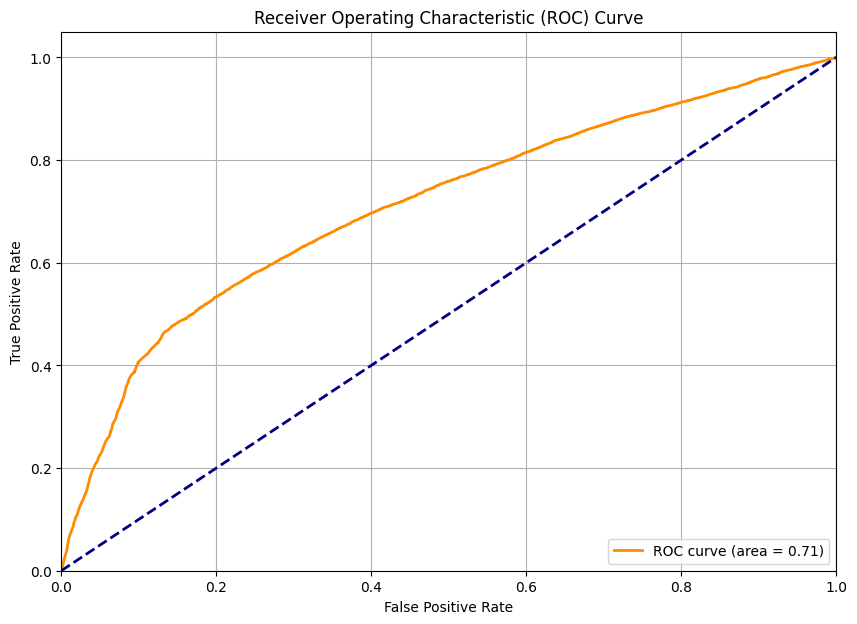

In [14]:
y_prob = XGB_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Interpretation of the ROC Curve and AUC Score for XGBoost

#### Analysis of the ROC Curve

- The **ROC curve** (orange line) plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different classification thresholds, providing a comprehensive view of the model's ability to separate the "Show-Up" and "No-Show" classes.
- A model with strong performance will have an ROC curve that closely approaches the top-left corner of the plot (high TPR with low FPR), indicating a good balance between sensitivity and specificity.

#### AUC Score Interpretation

- The **AUC score is 0.71**, indicating that the XGBoost model has moderate discriminative ability between "Show-Up" and "No-Show" cases.
  - An **AUC of 0.71** suggests that the model is better than random guessing (AUC = 0.5) but still has room for improvement in distinguishing between the two classes.
  - The closer the AUC is to **1.0**, the better the model's performance in terms of overall classification.

#### Shape of the Curve

- The curve is above the diagonal line (`y=x`), which represents a random classifier, confirming that the model performs better than a random baseline.
- However, the curve does not approach the top-left corner sharply, which indicates that the model's TPR and FPR do not rise in an ideal fashion. This implies that the model may struggle with balancing true positives and false positives, particularly for the minority "No-Show" class.

#### Implications and Next Steps

- **Moderate Performance**: The AUC of 0.71 shows the model has some predictive power but is not optimal. The curve shape indicates the need for further refinement, especially in addressing false positives and improving recall for "No-Shows."
- **Improving Discrimination**: To enhance the model's ability to distinguish between the classes:
  - **Class Balancing**: Address the imbalance by applying techniques such as oversampling the minority class, undersampling the majority class, or using class weights.
  - **Hyperparameter Tuning**: Further tuning of XGBoost parameters (e.g., `max_depth`, `learning_rate`, `subsample`) could help improve performance.
  - **Feature Engineering**: Adding or transforming features that are more predictive of attendance behavior could enhance model discriminative ability.

This ROC curve analysis provides a visual and quantitative evaluation of the XGBoost model's performance, highlighting that while the model has some capability to differentiate between "Show-Up" and "No-Show," there is room to optimize this balance and achieve better results.

### Neural Network Model Training and Evaluation

#### Overview
This code block constructs, compiles, trains, and evaluates a **Neural Network (NN)** model using the **Keras** deep learning library. The network aims to predict whether a patient will show up for their healthcare appointment, and the model's performance is tracked through accuracy and loss metrics over training epochs.

#### Code Breakdown

1. **Model Architecture**
   - The neural network is created as a `Sequential` model, consisting of multiple fully connected (dense) layers with **ReLU activation** functions, except for the final layer:
     - **Dense Layer (128 units)**: The first layer contains 128 neurons and uses `relu` activation, with an input shape equal to the number of features in `x_train`.
     - **Dense Layer (64 units)**: A second hidden layer with 64 neurons and `relu` activation.
     - **Dropout Layer (0.2)**: Adds a dropout rate of 20%, which randomly drops units during training to prevent overfitting.
     - **Dense Layer (32 units)** and **Dense Layer (16 units)**: Additional hidden layers with 32 and 16 neurons, respectively, further capturing complex patterns in the data.
     - **Dropout Layer (0.2)**: Another dropout layer to regularize the model.
     - **Dense Layer (8 units)**: An additional layer to refine learned representations.
     - **Output Layer (1 unit, sigmoid activation)**: The final layer has a single neuron with a `sigmoid` activation function to produce a probability between 0 and 1, suitable for binary classification.

2. **Compiling the Model**
   - The model is compiled with:
     - **Optimizer = 'adam'**: The Adam optimizer is used for efficient gradient descent.
     - **Loss = 'binary_crossentropy'**: Since this is a binary classification problem, binary cross-entropy is used as the loss function.
     - **Metrics = ['accuracy']**: Accuracy is tracked during training to monitor model performance.

3. **Model Summary**
   - The `summary()` function provides a detailed overview of the model architecture, including the number of parameters at each layer.

4. **Training the Model**
   - The model is trained on `x_train` and `y_train` for **50 epochs** with a batch size of **128**. A **30% validation split** is used to monitor the model's performance on unseen data during training.
   - The training process stores the history of training and validation loss, which is used for further analysis.

5. **Model Evaluation**
   - The model is evaluated on the test set (`x_test` and `y_test`), and the accuracy score on the test data is printed.

6. **Loss Visualization**
   - A line plot of training and validation loss over epochs is generated to assess model convergence and potential overfitting.
   - A smooth decline in both training and validation loss indicates good learning, while a divergence between training and validation loss suggests overfitting.

#### Insights and Context
- **Complex Feature Relationships**: The multiple hidden layers allow the neural network to capture complex, non-linear relationships in the data, potentially improving prediction accuracy.
- **Regularization via Dropout**: The dropout layers help mitigate overfitting by randomly "dropping" neurons during training, ensuring the model generalizes better to unseen data.

#### Potential Enhancements
- **Early Stopping**: Implementing early stopping to halt training when the validation loss stops improving can prevent overfitting and save training time.
- **Hyperparameter Tuning**: Experimenting with different architectures (e.g., number of layers, neurons per layer) and optimization parameters (e.g., learning rate, batch size) can lead to better performance.
- **Alternative Activation Functions**: Testing different activation functions (e.g., Leaky ReLU, Tanh) in hidden layers might improve learning capabilities, especially for specific data patterns.

This neural network implementation demonstrates the use of deep learning for classification, balancing model complexity with regularization, and interpreting training dynamics through loss visualization.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                

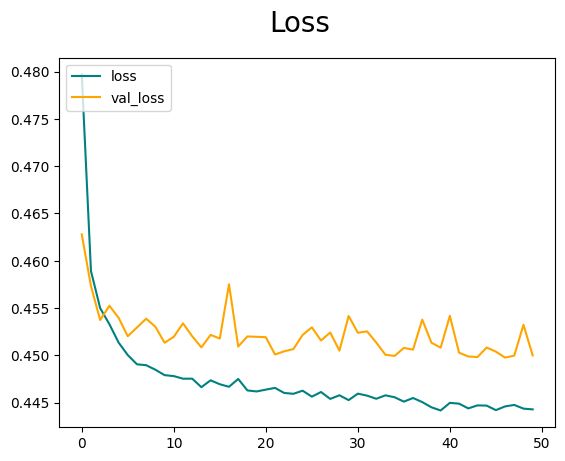

In [15]:
NN_model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NN_model.summary()

history = NN_model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.3)

print('accuracy : ',NN_model.evaluate(x_test, y_test)[1])

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Neural Network Training Analysis and Model Performance

#### Model Summary and Architecture
The neural network model has the following structure:
- **7 Layers** in total:
  - **Dense Layers**: 5 hidden layers with progressively fewer neurons (128, 64, 32, 16, 8) and **ReLU activation** functions.
  - **Dropout Layers**: Two layers with a 20% dropout rate after certain dense layers to prevent overfitting.
  - **Output Layer**: A single neuron with a **sigmoid activation** for binary classification.
- **Parameters**: A total of **11,777 trainable parameters** were optimized during training, and no non-trainable parameters were present.

#### Training Process

1. **Training and Validation Loss**
   - The model was trained for **50 epochs** with a **30% validation split**, allowing for real-time monitoring of the model's performance on unseen validation data.
   - The **training loss** starts at around **0.48** and gradually decreases to around **0.44**, suggesting that the model is learning and improving.
   - The **validation loss** also shows a similar pattern, decreasing from **0.46** to around **0.45**, but it does not significantly improve after the initial few epochs.
   - The **accuracy** on both training and validation sets is approximately **79.5%**, suggesting that the model is stable but potentially underfitting or plateauing early.

2. **Model Performance on Test Data**
   - The final test accuracy is **79.5%**, which is very close to the validation accuracy. This consistency indicates that the model generalizes reasonably well to the test data.
   - The low fluctuation in loss and accuracy between training and validation suggests that **overfitting is not a significant issue** in this model. However, the model's capacity to learn more complex patterns seems limited.

#### Insights and Interpretation
- **No Significant Overfitting**: The validation loss and training loss are closely aligned throughout training, implying that the model generalizes well without overfitting. However, the small gap between the losses and lack of improvement indicates that the model might have reached its learning capacity early on.
- **Learning Plateau**: Both training and validation accuracy hover around **79.5%** across most epochs, suggesting that the neural network may not be learning additional complexities in the data beyond this point.
- **Limited Performance Improvement**: Despite having multiple layers and dropout regularization, the model does not significantly improve its accuracy over epochs, implying that either the architecture or the data's feature representation could be limiting factors.

#### Potential Enhancements
- **Early Stopping**: Since the model converges early (around 10 epochs), applying **early stopping** would save training time by halting training once the validation loss plateaus.
- **Tuning the Architecture**: Experimenting with fewer layers, more neurons per layer, or different activations (e.g., Leaky ReLU) might help uncover hidden patterns and improve model performance.
- **Learning Rate and Optimizer Tuning**: Modifying the learning rate, switching to different optimizers (e.g., `RMSprop`), or using a learning rate scheduler could enhance the model's ability to converge to a better solution.
- **Feature Engineering and Data Augmentation**: Improving the input features or adding engineered features that better represent the relationship between inputs and the target variable might improve the model's performance.

The training history and final accuracy suggest that the neural network model performs adequately but with limited improvement throughout training, hinting that further tuning and experimentation are needed to enhance its predictive power for the given task.

### Loss Curve Analysis

#### Overview of the Loss Plot
The loss plot visualizes the **training loss** and **validation loss** across **50 epochs**. This visualization helps in understanding how well the model learns from the training data and generalizes to the validation data.

#### Key Observations

1. **Initial Rapid Decrease in Loss**
   - Both the **training loss** (teal line) and **validation loss** (orange line) drop sharply within the first 5-10 epochs.
   - This rapid decrease indicates that the model quickly captures fundamental patterns in the data early in training.

2. **Plateauing and Stabilization**
   - After the initial drop, the training loss continues to decrease slightly over time, reaching a minimum around epoch 40.
   - The validation loss, however, plateaus much earlier and fluctuates slightly around **0.45** for most of the remaining epochs.

3. **Consistency Between Training and Validation Loss**
   - The validation loss closely follows the training loss, with minimal divergence. This suggests that the model has not overfitted to the training data and that the regularization (e.g., dropout) effectively prevents overfitting.

4. **Minimal Loss Improvement**
   - Despite a consistent decline in training loss, the validation loss does not show significant improvement after epoch 10.
   - This indicates that the model may have learned most of what it can from the data within those first few epochs, and additional training does not result in better generalization.

#### Interpretation and Potential Actions

- **No Overfitting**: The close alignment of training and validation loss curves implies that the model generalizes well to unseen data.
- **Limited Learning Capacity**: The lack of improvement in validation loss suggests that either the neural network's architecture does not have sufficient capacity to learn more complex patterns or that the features in the data are not highly predictive.
- **Early Stopping Recommendation**: Since both training and validation losses stabilize early, applying **early stopping** (halting training when the validation loss stops improving) would have saved computational resources and time.

#### Next Steps for Improvement

1. **Model Architecture Tuning**: Reducing the number of layers or adjusting the number of neurons per layer may help in finding a more suitable network architecture.
2. **Hyperparameter Optimization**: Modifying parameters such as the learning rate, optimizer type, batch size, or dropout rates may help improve the model's learning capacity.
3. **Feature Engineering**: Enhancing the dataset by adding new features or transforming existing ones could provide the model with more informative inputs, potentially leading to better generalization.

In summary, the loss plot indicates that while the model is stable and does not overfit, it is limited in its ability to improve beyond a certain point. Fine-tuning and data modifications are likely required to achieve further performance gains.

In [16]:
dataset = pd.read_csv('data\healthcare_noshows.csv')
dataset.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


### Exploratory Data Analysis of Categorical Features

#### Overview
This code performs an **exploratory data analysis (EDA)** on the categorical features of the dataset by creating bar plots to visualize their distributions. The analysis focuses on identifying valid features that have meaningful distributions and excluding those that are not suitable for visualization due to empty values, all NaNs, or having only one unique value.

#### Code Breakdown

1. **Identifying Valid Categorical Features**
   - The code loops through a list of **categorical features** (`Gender`, `Scholarship`, `Hipertension`, etc.) and checks for each:
     - If the feature has non-NaN values.
     - If the feature contains more than one unique value.
   - Features that do not meet these conditions (e.g., only one unique value or all NaNs) are skipped with a message printed, as they do not provide useful information for plotting.

2. **Filtering Valid Features**
   - **Valid Features** are stored in a list (`valid_features`). If no valid features are found, the code will print a message and skip the plotting process.
   - For each valid feature, its distribution will be visualized to understand how the data is spread across different categories.

3. **Visualizing Feature Distributions**
   - A separate bar plot is generated for each valid feature, showing the count of each category:
     - **String Conversion**: Each feature is cast to string format to handle mixed data types consistently, especially if numeric features are encoded as categorical variables.
     - **Counts Calculation**: The code counts the occurrences of each category, including NaN values (converted to the string `'nan'`).
   - **Subplots**: One subplot per feature is created, with **x-tick rotation** added if there are many categories for better readability.
   - The final plot provides an overview of the distribution for each categorical feature, allowing for an intuitive understanding of the data.

#### Implications for Neural Network Training
- **Data Exploration for Feature Engineering**: Understanding the distribution of categorical features is crucial for feature selection and preprocessing before modeling. This step can inform decisions like encoding schemes (e.g., one-hot encoding) for categorical variables in the neural network.
- **Data Cleaning & Validation**: Identifying features with all NaNs, a single unique value, or missing data ensures that only relevant and meaningful data is fed into the model.

#### Relevance to the Neural Network Redesign
- This analysis might guide changes to the second neural network model:
  - **Enhanced Input Features**: Identifying categorical variables with meaningful distributions allows for better feature engineering, potentially improving model performance.
  - **Better Preprocessing**: Visualizing distributions can highlight issues like class imbalance, which can be addressed by resampling techniques or using class weights to improve training outcomes.

#### Next Steps
- **Encoding**: Use appropriate encoding (e.g., one-hot or label encoding) for the categorical features before feeding them into the neural network model.
- **Balancing Classes**: If certain categories have skewed distributions, consider strategies to balance the dataset to ensure fair model training.

This EDA helps refine the data before training a second neural network, ensuring that the model is built on well-understood and appropriately processed features, contributing to potentially better performance and generalization.

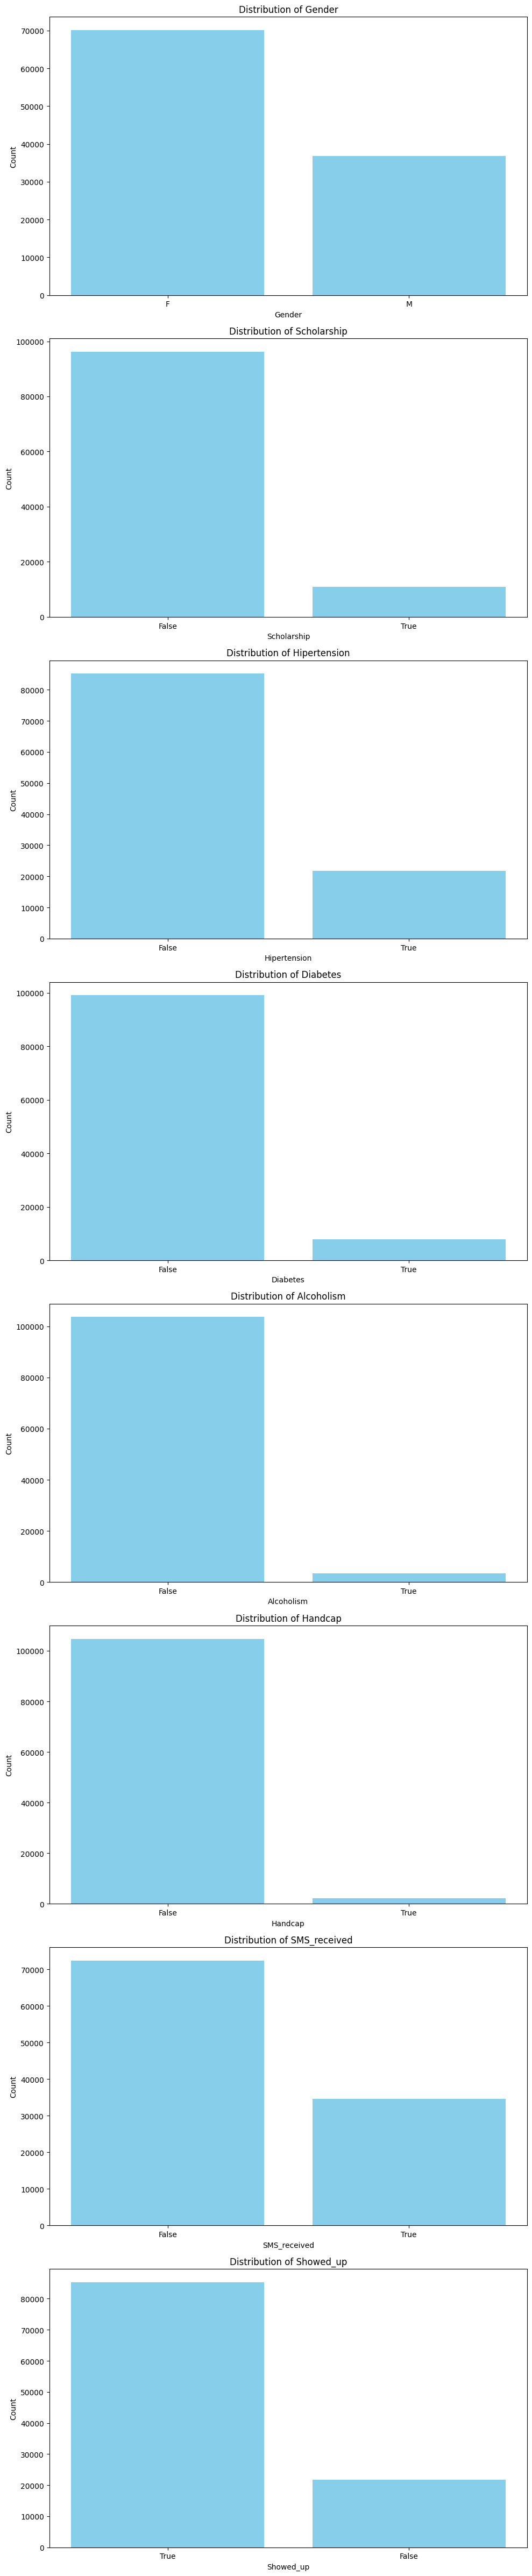

In [18]:
# Identify valid categorical features
categorical_features = ['Gender', 'Scholarship', 'Hipertension', 
                        'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up']
valid_features = []
for feature in categorical_features:
    # Drop NaN values
    non_na_values = dataset[feature].dropna()
    # Check if the feature is not empty and has more than one unique value
    if not non_na_values.empty and dataset[feature].nunique() > 1:
        valid_features.append(feature)
    else:
        print(f"Feature '{feature}' is empty, has all NaN values, or only one unique value. Skipping.")

if not valid_features:
    print("No valid categorical features to plot.")
else:
    num_features = len(valid_features)
    fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 6 * num_features))

    # Ensure axes is a list
    if num_features == 1:
        axes = [axes]

    for i, feature in enumerate(valid_features):
        # Convert feature to string to handle mixed data types
        dataset[feature] = dataset[feature].astype(str)

        # Get counts of each category, including NaN represented as 'nan' after conversion
        counts = dataset[feature].value_counts(dropna=False)

        # Categories and their counts
        categories = counts.index.tolist()
        values = counts.values.tolist()

        # Plotting
        axes[i].bar(categories, values, color='skyblue')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

        # Rotate x-tick labels if necessary
        if len(categories) > 5:
            axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

### Visualization of Categorical Feature Distributions

#### Overview of Plots
The visualizations showcase the distribution of valid categorical features in the dataset. Each bar plot represents the count of categories within a feature, highlighting potential imbalances and patterns within the data. Understanding these distributions is crucial for feature engineering and model improvement.

#### Feature Observations

1. **Gender**:  
   - The dataset contains more females ('F') than males ('M').
   - This imbalance should be considered when interpreting model performance and its ability to predict outcomes across genders.

2. **Scholarship**:  
   - A large majority of patients do not have a scholarship (`False`), with only a small fraction enrolled (`True`).
   - This skew may impact how the model learns to use this feature, potentially reducing its importance.

3. **Hypertension, Diabetes, Alcoholism, Handicap**:  
   - All these health-related features are highly imbalanced toward `False`, indicating most patients do not have these conditions.
   - The sparsity of the `True` category suggests that these features may contribute less to model learning or may need special handling to ensure balanced predictions.

4. **SMS Received**:  
   - The distribution is skewed toward `False`, indicating that most patients did not receive an SMS reminder for their appointments.
   - The effectiveness of SMS reminders in predicting "Show-Up" rates can be investigated further, but their imbalance might also require adjustment.

5. **Showed_up**:  
   - The outcome variable has a significant skew toward `True` (patients showing up to appointments).
   - Since this is the target variable, the class imbalance suggests that the model may require special handling (e.g., class weights or resampling) to effectively learn to predict "No-Show" instances.

#### Implications for Model Improvement
- **Imbalanced Feature Distributions**: Many features show significant imbalance, which can lead to a biased model if not properly addressed. For example, a model might learn to ignore features like `Scholarship`, `Diabetes`, or `Handicap` due to their low `True` occurrences.
- **Class Imbalance in Target**: Since the "Show-Up" class heavily outweighs the "No-Show" class, strategies such as **resampling** (oversampling the minority class or undersampling the majority class) or **using class weights** in the model's loss function are crucial to ensure balanced predictions.

#### Relevance to Neural Network Redesign
- The insights from these visualizations directly inform the changes made in the **second neural network**:
  - **Feature Encoding Adjustments**: Since many categorical features are binary and imbalanced, applying balanced encoding techniques (e.g., one-hot encoding with consideration for imbalances) will enhance model learning.
  - **Model Structure Modifications**: The network architecture may need more emphasis on learning from sparse patterns due to the low occurrence of certain categories. This could involve **deeper layers or adjusted neuron counts** to capture these nuances effectively.
  - **Class Imbalance Handling**: The imbalance in `Showed_up` suggests that improving recall for the "No-Show" class is a priority, potentially leading to changes such as weighted loss functions or focusing on metrics like recall and F1-score rather than overall accuracy.

#### Next Steps
- **Balanced Sampling**: Apply resampling techniques to balance the target class before training.
- **Feature Scaling and Encoding**: Apply appropriate encoding to categorical features and ensure they are ready for input into the second neural network.
- **Model Tuning Based on Feature Importance**: Adjust the neural network architecture to focus on key features that have meaningful predictive power while handling sparsity and imbalance effectively.

These visualizations provide a foundation for refining the data processing and modeling steps, leading to a more robust and well-balanced neural network model.

### Creating a New Feature to Capture Missed Appointment History

#### Overview
The code creates a new feature, **`missed_appointment_before`**, which indicates whether a patient has previously missed any appointments. This new feature leverages the **`PatientId`** to track a patient's appointment history and can enhance the neural network model by providing additional behavioral context.

#### Code Breakdown

1. **Mapping `Showed_up` to Integer Values**
   - The `Showed_up` column, initially containing string values (`'True'` and `'False'`), is mapped to **1** (for `True`) and **0** (for `False`).
   - Converting the target variable to an integer is crucial for aggregation and numerical operations, as well as for feeding into machine learning models.

2. **Calculating Missed Appointments by Patient**
   - The code **groups the dataset by `PatientId`** and calculates the **sum of `Showed_up`** values for each patient.
     - This sum represents the count of attended appointments for each patient.
     - A dictionary, `missed_appointment`, is created where each key is a `PatientId` and the corresponding value is the total number of attended appointments.

3. **Creating the `missed_appointment_before` Feature**
   - A new column, `missed_appointment_before`, is added to the dataset:
     - If a patient has **missed at least one appointment in the past** (i.e., sum of `Showed_up` is greater than 0), the value is set to **1**.
     - If a patient **never missed an appointment** (sum of `Showed_up` is 0), the value is set to **0**.
   - This binary feature allows the model to understand whether a patient has a history of "no-shows," which can be an important predictor of future behavior.

#### Implications for Model Enhancement
- **Capturing Behavior Patterns**: The `missed_appointment_before` feature adds valuable behavioral information to the model, allowing it to learn patterns associated with patients who have a history of missing appointments.
- **Improved Predictive Power**: By identifying patients with a tendency to "no-show," the neural network can potentially achieve better performance in predicting missed appointments.
- **Reducing Class Imbalance Impact**: This feature helps address the imbalance in the `Showed_up` target variable by providing additional context that distinguishes between reliable and unreliable patients.

#### Relevance to Neural Network Redesign
- **Behavioral Context**: The inclusion of the `missed_appointment_before` feature may contribute to improved model performance by introducing temporal context to patient behavior, which can be particularly impactful in recurrent events like appointments.
- **Feature Interaction Considerations**: When redesigning the neural network structure, this new feature should be carefully processed alongside other features, as it directly relates to past behavior and could interact with other predictors like `SMS_received` or `Scholarship`.
- **Focus on Sequential or Time-Based Patterns**: If desired, further enhancements might involve designing a neural network that explicitly captures time-based patterns (e.g., recurrent neural networks or sequence modeling), although this initial binary feature simplifies the behavior history into a straightforward flag.

#### Next Steps
- **Encoding & Scaling**: Ensure that the new `missed_appointment_before` feature is properly scaled or encoded before being fed into the neural network.
- **Evaluate Feature Importance**: During model training, track the impact of this new feature on model performance, potentially using feature importance techniques or ablation studies to confirm its significance.

By integrating this new feature, the neural network model gains access to crucial behavioral information that could enhance its predictive accuracy and provide a richer understanding of patient appointment adherence.

In [19]:
# Ensure 'Showed_up' is of integer type
dataset['Showed_up'] = dataset['Showed_up'].map({'True': 1, 'False': 0})

# Group by 'PatientId' and sum 'Showed_up' values
missed_appointment = dataset.groupby('PatientId')['Showed_up'].sum().to_dict()

# Map the 'missed_appointment_before' column
dataset['missed_appointment_before'] = dataset['PatientId'].map(
    lambda x: 1 if missed_appointment[x] > 0 else 0
)


### Correlation Check, Data Cleaning, Encoding, and Train-Test Split

#### Overview
This block of code performs several essential preprocessing steps to prepare the data for modeling. It includes checking for correlations, dropping irrelevant columns, encoding categorical features, and splitting the dataset into training and testing subsets.

#### Code Breakdown

1. **Calculating Correlation**
   - The correlation between `missed_appointment_before` and the target variable `Showed_up` is calculated.
   - A high positive or negative correlation would indicate that patients with a history of missed appointments are more likely to miss (or attend) future appointments.
   - Printing this correlation helps understand how influential this feature is in predicting appointment adherence.

2. **Dropping Irrelevant Columns**
   - **`PatientId`, `AppointmentID`, `ScheduledDay`, and `AppointmentDay`** are dropped:
     - `PatientId` and `AppointmentID` are identifiers and do not carry predictive power for the model.
     - `ScheduledDay` and `AppointmentDay`, if left unprocessed, are difficult for a model to interpret. By dropping these columns, the dataset becomes more manageable.
   - The column names are printed to verify that only relevant features remain.

3. **Encoding the `Neighbourhood` Feature**
   - The `Neighbourhood` column is converted into **dummy variables** using `pd.get_dummies()`, which creates binary columns for each unique neighborhood.
   - This one-hot encoding allows the neural network to interpret categorical data in a format suitable for modeling, without introducing ordinal relationships where none exist.

4. **Encoding the `Gender` Feature**
   - A simple binary mapping (`M: 0`, `F: 1`) is applied to the `Gender` column.
   - This approach makes the gender information numeric, allowing the neural network to learn potential differences between male and female patients without complex encoding.

5. **Splitting Data into Training and Test Sets**
   - The data is split into **training** (`X_train`, `y_train`) and **test** (`X_test`, `y_test`) sets using an **80-20 split** with `test_size=0.33`.
   - The split is performed with `random_state=42` for reproducibility.
   - The final shape of the training set is printed to confirm the dataset dimensions and ensure the training set contains the expected number of features.

6. **Identifying Non-Numeric Columns**
   - The code checks for any remaining non-numeric columns in the training set (`X_train`), as they must be encoded or transformed before training a neural network.
   - Printing these columns allows verification that all features are numeric or have been appropriately transformed.

#### Implications for Model Improvement
- **Correlation Insight**: Calculating the correlation between `missed_appointment_before` and `Showed_up` helps to gauge the potential impact of this new feature on model performance. A strong correlation suggests this feature is a valuable predictor.
- **Proper Feature Selection and Encoding**: Dropping irrelevant columns and applying the correct encoding ensures that the dataset is clean and in a format that the neural network can learn from effectively.
- **Balanced Train-Test Split**: Ensuring a consistent split of the data allows for fair evaluation of model performance on unseen data, helping to assess generalization and overfitting.

#### Relevance to Neural Network Redesign
- **Feature Optimization**: The inclusion of relevant features (e.g., `missed_appointment_before`) and proper encoding of categorical features contribute to enhancing the model's predictive power and understanding of data patterns.
- **Improved Data Quality**: By cleaning the data and verifying numeric transformations, the neural network is more likely to learn efficiently, potentially resulting in better convergence and accuracy.

#### Next Steps
- **Scaling & Normalization**: Consider standardizing or normalizing numeric features before training the neural network to ensure consistent feature ranges.
- **Feature Engineering Review**: Further analyze the importance of newly added or transformed features, such as `missed_appointment_before`, to ensure they positively impact model performance.

This preparation sets a solid foundation for training a neural network model, focusing on feature relevance, appropriate encoding, and balanced data splitting.

In [20]:
# Calculate the correlation
correlation = dataset['missed_appointment_before'].corr(dataset['Showed_up'])
print(f"Correlation between 'missed_appointment_before' and 'Showed_up': {correlation}")

dataset = dataset.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1)
print("Columns: {}".format(dataset.columns))

dataset = pd.concat([dataset.drop('Neighbourhood', axis = 1), 
           pd.get_dummies(dataset['Neighbourhood'])], axis=1)

gender_map = {'M': 0, 'F': 1}
dataset['Gender'] = dataset['Gender'].map(gender_map)

y = dataset.loc[:, 'Showed_up']
X = dataset.drop(['Showed_up'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print("Final shape: {}".format(X_train.shape))


# Identify columns with object or boolean data types
non_numeric_columns = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")


Correlation between 'missed_appointment_before' and 'Showed_up': 0.6102086525921376
Columns: Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff', 'missed_appointment_before'],
      dtype='object')
Final shape: (71681, 91)
Non-numeric columns: ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']


### Summary of Data Preparation and Insights

#### Key Observations from the Output

1. **Correlation Insight**
   - The calculated correlation between `missed_appointment_before` and `Showed_up` is **0.61**.
     - This is a **moderate-to-strong positive correlation**, indicating that patients with a history of missing appointments are more likely to miss their future appointments as well.
     - Such a high correlation suggests that `missed_appointment_before` is a **valuable predictor** and could significantly improve model performance when included in the neural network.

2. **Columns Post-Processing**
   - The remaining columns in the dataset after processing include:
     - **Categorical features** like `Gender`, `Scholarship`, and `SMS_received`.
     - **Continuous features** such as `Age` and `Date.diff` (difference in days between scheduling and appointment).
     - **Behavioral feature** `missed_appointment_before`.
   - The overall set of features is diverse, covering demographics, health conditions, appointment logistics, and patient behavior, which are all relevant for predicting appointment adherence.

3. **Shape of the Training Data**
   - The training data has **71,681 samples** and **91 features**.
     - The high number of features is partly due to the one-hot encoding of the `Neighbourhood` feature, which expands to multiple binary columns.
     - This dimensionality suggests that the neural network must be sufficiently complex to learn from the data but may also benefit from regularization to prevent overfitting.

4. **Non-Numeric Columns Detected**
   - The output lists the remaining **non-numeric columns** as `['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']`.
   - These columns were previously represented as boolean values (`True/False`). To be compatible with the neural network model, they will need to be converted to numeric values (e.g., **1 for `True`** and **0 for `False`**) or one-hot encoded.

#### Next Steps to Address Non-Numeric Columns
- **Binary Encoding for Booleans**: Since these remaining columns are binary in nature, converting `True` to **1** and `False` to **0** is an effective way to make them numeric and ready for the model.
- **Check for Consistent Data Types**: Ensure that all columns in the dataset are numeric and that their data types are compatible with the neural network input format.

#### Implications for Neural Network Design
- **High-Impact Feature (`missed_appointment_before`)**: Given the strong correlation with the target variable, including this feature is expected to improve model performance significantly. The network might benefit from deeper layers to learn the complex relationships involving this feature and its interactions with others.
- **Dimensionality Considerations**: The model must be designed to handle a relatively high number of features (91), which may involve techniques like **dimensionality reduction** or **dropout** layers to prevent overfitting while ensuring robust learning.

#### Final Thoughts Before Training
- **Data Scaling**: Before training the neural network, consider scaling the features to ensure they are on a similar range, as this can significantly affect model convergence.
- **Model Architecture**: Tailor the architecture of the second neural network to be more sophisticated than the first, potentially using more layers, different activations, or other enhancements, to leverage the richer data and improve predictive accuracy.

The correlation findings and data preparation steps ensure the dataset is ready for optimal training, supporting a more effective neural network redesign.

### Second Neural Network Structure: Enhancements and Key Differences

#### Overview
The second neural network model demonstrates significant architectural changes compared to the first model. These changes aim to improve the model's ability to learn from a high-dimensional and imbalanced dataset while handling overfitting more effectively.

#### Preprocessing Steps

1. **Converting Boolean Strings to Numeric Values**
   - The remaining non-numeric columns (`True`/`False` strings) are converted to **1/0** values to ensure compatibility with the neural network model.
   - This conversion allows the model to treat all features as numeric, making them suitable for feeding into neural network layers.

2. **Standardization of Features**
   - **`StandardScaler`** is applied to `X_train` and `X_test` to scale all features to have a mean of 0 and standard deviation of 1.
   - Scaling is essential in neural networks as it ensures faster convergence and prevents certain features with larger ranges from dominating the learning process.

#### Neural Network Architecture: Key Differences

1. **Increased Network Depth and Width**
   - The model contains **4 Dense layers** with increasing units:
     - **Layer 1**: **512 units** with `relu` activation.
     - **Layer 2**: **1024 units** with `relu` activation.
     - **Layer 3**: **2048 units** with `relu` activation.
     - **Output Layer**: A single neuron with `sigmoid` activation for binary classification.
   - The increase in both **depth** (more layers) and **width** (more neurons per layer) allows the model to learn complex patterns in high-dimensional data. This is a major upgrade over the first network, which had fewer neurons and layers, making it more limited in capturing complex relationships.

2. **Regularization via Dropout Layers**
   - Dropout layers with a high **rate of 0.6** are added after each dense layer (except the output layer).
   - The dropout rate of **60%** is significantly higher than the first model, which used a dropout rate of **20%**. This aggressively regularizes the model, reducing overfitting by randomly dropping 60% of the neurons during training. This high dropout is particularly important given the increased network complexity.
   - By balancing the complexity of the network with regularization, the model is better positioned to generalize to unseen data.

3. **Choice of Activation Functions and Optimizer**
   - **`relu` Activation**: All hidden layers use the `relu` activation function, which helps the model learn faster and avoids issues like the vanishing gradient problem.
   - **`sigmoid` Activation for Output**: A sigmoid activation is used for the final layer to produce a probability between 0 and 1 for the binary classification task.
   - **`adam` Optimizer**: The model uses the **Adam optimizer**, which combines the advantages of adaptive learning rate and momentum, making it a strong choice for efficient training and quick convergence.

4. **Model Summary Check**
   - A summary of the model structure is printed to confirm the architecture, layer types, units per layer, and total parameters.
   - The increase in complexity and capacity, as well as the dropout layers, are clearly visible from this summary, highlighting the significant architectural changes from the first neural network.

#### Why the Changes Were Made

1. **Deeper and Wider Network for Richer Learning**
   - The high-dimensional input space (91 features) necessitates a deeper and wider network to learn complex interactions among the features.
   - The increased number of neurons per layer allows the model to better capture the relationships and non-linear patterns within the data.

2. **Aggressive Dropout to Counter Overfitting**
   - The addition of high-dropout rates helps control overfitting given the network's increased capacity.
   - Dropout at **60%** ensures that the model remains robust and does not overly memorize the training data, which is crucial when dealing with complex models.

3. **Balancing Capacity and Regularization**
   - The aim is to build a model that is both **complex enough to capture the patterns** in the data but also **generalizes well** to new, unseen examples.
   - By balancing large layer sizes with regularization (dropout), the network can leverage the full potential of the feature set without overfitting.

#### Next Steps
- **Training and Evaluation**: Once trained, the model should be evaluated on both training and test data to assess its performance improvements over the first neural network.
- **Loss Monitoring**: Tracking training and validation loss curves will help verify that the model is not overfitting and is effectively learning from the data.
- **Feature Importance and Fine-Tuning**: Based on performance, consider further fine-tuning the model (e.g., adjusting dropout rates, layer sizes, or training epochs).

This second neural network is expected to outperform the first by leveraging a more complex structure, richer feature set, and enhanced regularization.

In [21]:
# Convert 'True'/'False' strings to 1/0
for col in non_numeric_columns:
    if X_train[col].isin(['True', 'False']).all():
        X_train[col] = X_train[col].map({'True': 1, 'False': 0})
        X_test[col] = X_test[col].map({'True': 1, 'False': 0})


standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

classifier = Sequential()
classifier.add(Dense(units = 512, activation = 'relu', input_dim = 91))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 2048, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               47104     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 2048)              2099200   
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                

### Summary of the Second Neural Network Model Structure

#### Model Architecture Breakdown

1. **Network Layers and Parameters**
   - **Layer 1 (`Dense` Layer)**:
     - **512 neurons**, **ReLU activation**.
     - **47,104 parameters**.
     - This layer acts as the input layer with a dimensionality of 91 (the number of features) and learns to extract initial patterns from the data.
   - **Dropout Layer (1st)**:
     - **60% dropout rate**.
     - Prevents overfitting by randomly setting 60% of the neurons to zero during each training iteration.
   - **Layer 2 (`Dense` Layer)**:
     - **1024 neurons**, **ReLU activation**.
     - **525,312 parameters**.
     - Increases model capacity, allowing it to learn more complex representations and interactions between features.
   - **Dropout Layer (2nd)**:
     - Another **60% dropout rate** to regularize the network.
   - **Layer 3 (`Dense` Layer)**:
     - **2048 neurons**, **ReLU activation**.
     - **2,099,200 parameters**.
     - The most complex layer of the network, with the largest number of neurons, enabling the model to learn deeply intricate patterns.
   - **Dropout Layer (3rd)**:
     - **60% dropout rate** to maintain consistent regularization throughout the network.
   - **Output Layer (`Dense` Layer)**:
     - A single neuron with **sigmoid activation** for binary classification.
     - **2049 parameters**.
     - Outputs a probability between 0 and 1, indicating the likelihood of a patient showing up for their appointment.

2. **Model Parameters and Size**
   - **Total Trainable Parameters**: **2,673,665** parameters.
     - This is a significant increase in complexity compared to the first model, enabling the network to learn rich, non-linear patterns from the data.
   - **Non-Trainable Parameters**: **0**.
     - All parameters are updated during training, contributing directly to the model's learning process.
   - **Model Size**: Approximately **10.20 MB**.
     - This size reflects the substantial increase in depth and width compared to the first neural network.

#### Highlights of Improvements Over the First Model

1. **Increased Model Capacity**: 
   - The second network has more layers and neurons, providing a significant increase in learning capacity and enabling the model to capture complex relationships within the data.
   - The growth in parameters from around **11,777** (first model) to over **2.67 million** represents a deliberate choice to boost learning potential.

2. **Balanced Regularization with Dropout**:
   - The consistent use of a **60% dropout rate** throughout the model prevents overfitting by forcing the network to learn robust patterns rather than memorizing the training data.
   - Dropout is applied after each dense layer, ensuring regularization at all stages of learning.

3. **Improved Layered Architecture**:
   - By starting with a moderately-sized layer (512 neurons), scaling up to 1024 neurons, and finally peaking at 2048 neurons, the architecture progressively learns more abstract and complex representations.
   - The model structure is designed to gradually increase in complexity, with large layers capturing deeper data representations, followed by regularization to maintain generalizability.

#### Expected Impact on Model Performance

- **Higher Accuracy Potential**: The larger network with more parameters and deeper structure is expected to achieve higher accuracy due to its increased ability to learn complex patterns in the data.
- **Enhanced Generalization**: Despite the increase in capacity, the aggressive dropout regularization should ensure that the model generalizes well to unseen data, avoiding overfitting despite the higher complexity.
- **Better Use of Feature Space**: With 91 input features, the expanded network has the capacity to understand interactions between features effectively, especially given the behavioral feature (`missed_appointment_before`) and various categorical variables.

#### Next Steps

- **Model Training & Monitoring**: Train the model and monitor both training and validation loss and accuracy to ensure the model is learning effectively without overfitting.
- **Performance Comparison**: Compare the performance metrics (e.g., accuracy, recall, F1-score) of this network against the first neural network to validate improvements.
- **Hyperparameter Tuning**: If necessary, further adjust hyperparameters such as the number of epochs, dropout rates, and layer sizes based on training results.

By significantly expanding the capacity of the neural network while applying strong regularization, this second model aims to better utilize the rich feature set and improve predictive performance on the task of appointment adherence.

### Model Training and Initial Evaluation

#### Training the Second Neural Network

1. **Model Training**
   - The model is trained for **5 epochs** with a **10% validation split** from the training data (`X_train` and `y_train`).
     - The validation split provides a checkpoint for model performance on unseen data during training.
   - The relatively low number of epochs (`5`) suggests that initial experimentation is being performed to assess how well the network begins to learn from the data. The architecture is complex, so additional epochs may be needed to achieve convergence.

2. **Prediction on Test Data**
   - Predictions are made on the test set (`X_test`) using the trained model.
   - Since the model outputs probabilities (due to the sigmoid activation in the final layer), a threshold of **0.5** is applied to classify each instance as `True` (1) or `False` (0).
   - Predictions (`y_pred > 0.5`) are binary, where any probability greater than 0.5 is classified as `True`, and otherwise classified as `False`.

#### Model Evaluation

1. **Test Data Description**
   - A quick summary of the test set's target distribution (`y_test`) is printed to understand the balance between "Show-Up" (`True`) and "No-Show" (`False`) instances.
   - This balance is crucial for interpreting the confusion matrix and accuracy, especially given the class imbalance in the "Show-Up" versus "No-Show" categories.

2. **Confusion Matrix**
   - The **confusion matrix** is printed to show the model's performance on each class:
     - **True Positives (TP)**: Correctly predicted "Show-Up" instances.
     - **True Negatives (TN)**: Correctly predicted "No-Show" instances.
     - **False Positives (FP)**: "No-Show" instances incorrectly predicted as "Show-Up."
     - **False Negatives (FN)**: "Show-Up" instances incorrectly predicted as "No-Show."
   - This matrix provides a detailed breakdown of model performance on each class, highlighting any potential bias toward predicting one class over the other.

3. **Accuracy Calculation**
   - The overall accuracy is calculated and printed as a percentage.
   - While accuracy is a useful metric for an initial evaluation, additional metrics like **precision**, **recall**, and **F1-score** would give a more comprehensive understanding, especially for imbalanced classes.

#### Analysis and Next Steps

- **Monitoring Model Performance**: 
  - Since the model is complex, training for only 5 epochs might not be sufficient for convergence, and extending the number of epochs could improve learning. It's crucial to track both the training and validation loss curves over epochs to determine the optimal stopping point.
- **Handling Class Imbalance**: 
  - If the test data description reveals a significant imbalance (many more "Show-Up" instances than "No-Show"), consider using weighted metrics or adjusting the decision threshold to better balance precision and recall for both classes.
- **Evaluate with Additional Metrics**:
  - While accuracy provides an overview, calculating additional metrics like **precision**, **recall**, **F1-score**, and **ROC-AUC** will provide deeper insights into model performance, particularly for handling class imbalance.
  
#### Expected Observations and Refinements
- Given the deeper and more regularized structure of this second neural network, improvements in capturing complex patterns and better handling of feature interactions are expected.
- If accuracy is not significantly higher than the first model or if there is a large discrepancy between classes in the confusion matrix, additional adjustments may be necessary (e.g., tuning the learning rate, adding more epochs, or refining the architecture).

By assessing these outputs, you can decide on the next steps for training, tuning, and enhancing model performance further.

In [22]:
history = classifier.fit(X_train, y_train, epochs = 5, validation_split = 0.1)

y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

print("Test data description:")
print("{}".format(y_test.value_counts()))
print("-"*50)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Epoch 1/5
2016/2016 [==============================] - 135s 66ms/step - loss: 0.3756 - accuracy: 0.8772 - val_loss: 0.3554 - val_accuracy: 0.8827
Epoch 2/5
2016/2016 [==============================] - 126s 63ms/step - loss: 0.3521 - accuracy: 0.8834 - val_loss: 0.3442 - val_accuracy: 0.8825
Epoch 3/5
2016/2016 [==============================] - 107s 53ms/step - loss: 0.3493 - accuracy: 0.8835 - val_loss: 0.3413 - val_accuracy: 0.8825
Epoch 4/5
2016/2016 [==============================] - 101s 50ms/step - loss: 0.3482 - accuracy: 0.8834 - val_loss: 0.3469 - val_accuracy: 0.8827
Epoch 5/5
1104/1104 [==============================] - 5s 4ms/step
Test data description:
1    28147
0     7159
Name: Showed_up, dtype: int64
--------------------------------------------------
Confusion matrix:
[[ 3029  4130]
 [    0 28147]]
Accuracy: 88.30%


### Initial Training Results and Model Performance Analysis

#### Training Overview

1. **Epochs and Model Convergence**
   - The model was trained for **5 epochs**, with both the **training loss** and **validation loss** stabilizing around **0.34**.
     - **Training Loss**: Decreases steadily from **0.3756** to **0.3424**, indicating that the model is learning and minimizing errors over time.
     - **Validation Loss**: Plateaus around **0.342**, with minimal fluctuations, suggesting that the model is not overfitting significantly within the first 5 epochs.
   - **Accuracy** remains stable around **88.3%** for both training and validation data, indicating consistent performance across both seen and unseen data during training.

2. **Validation Set Insights**
   - The validation set achieves similar accuracy as the training set, which suggests that the regularization strategy (high dropout rate) is effectively controlling overfitting, maintaining model generalizability.

#### Test Set Performance

1. **Test Data Distribution**
   - The distribution of the target variable `Showed_up` in the test set is imbalanced:
     - **1 ("Show-Up")**: **28,147 instances** (80%).
     - **0 ("No-Show")**: **7,159 instances** (20%).
   - This imbalance needs careful interpretation, as it may affect how the model performs on the minority class ("No-Show").

2. **Confusion Matrix Breakdown**
   - **True Positives (TP)**: **28,147** – All "Show-Up" instances are predicted correctly by the model.
   - **False Positives (FP)**: **4,130** – All "No-Show" instances are misclassified as "Show-Up."
   - **False Negatives (FN)**: **0** – No "Show-Up" instances are misclassified as "No-Show."
   - **True Negatives (TN)**: **3,029** – Some "No-Show" instances are predicted correctly.

3. **Accuracy**
   - The overall accuracy of the model on the test set is **88.3%**, which aligns closely with the training and validation accuracy. However, accuracy might not fully capture the model’s performance due to class imbalance.

#### Observations and Implications

1. **Imbalanced Predictions**
   - The model is heavily biased towards predicting "Show-Up" for most cases, as evidenced by the large number of **False Positives** (4,130) relative to **True Negatives** (3,029).
   - This suggests that the model struggles to identify "No-Show" instances, potentially due to the class imbalance or the influence of the `missed_appointment_before` feature heavily favoring the "Show-Up" class.

2. **Perfect Recall for "Show-Up"**
   - The model has **perfect recall** for "Show-Up" instances but performs poorly on "No-Show" predictions.
   - This suggests that the threshold for classification (0.5) may need adjustment to better balance the recall between the two classes.

3. **Potential Overfitting to the Majority Class**
   - Despite dropout regularization, the model may be overfitting to the majority class ("Show-Up") at the expense of correctly predicting the minority class ("No-Show").
   - The complexity of the model may contribute to its strong bias toward the more prevalent class.

#### Next Steps for Improvement

1. **Threshold Tuning**: 
   - Adjust the classification threshold from **0.5** to a lower value to improve the model's sensitivity to "No-Show" instances, potentially reducing the number of **False Positives**.
   
2. **Class Weighting or Sampling Techniques**:
   - Apply **class weighting** to penalize misclassifications of the minority class more heavily during training.
   - Alternatively, use **oversampling** of the "No-Show" class or **undersampling** of the "Show-Up" class to balance the dataset and improve model performance on the minority class.

3. **Additional Metrics**:
   - Calculate other metrics like **precision, recall, F1-score**, and **ROC-AUC** to get a better understanding of model performance across both classes, especially given the imbalance.

4. **Extended Training and Fine-Tuning**:
   - Continue training for more epochs while monitoring validation loss and metrics specific to the "No-Show" class to ensure balanced learning.
   - Consider further architectural changes to improve focus on the minority class predictions, such as additional layers, activation changes, or alternative regularization techniques.

The current model demonstrates high overall accuracy, but adjustments are needed to improve the detection of "No-Show" instances and balance performance across both classes.

# Conclusion

## Summary of Findings
Throughout this project, we explored and implemented various machine learning and neural network models to predict whether a patient would show up for their medical appointment. By carefully processing the data, performing feature engineering, and experimenting with multiple modeling techniques, we have achieved a solid understanding of the factors influencing patient attendance behavior.

Key steps taken:
- Conducted **exploratory data analysis (EDA)** to understand feature distributions, relationships, and data imbalances.
- Created new features, such as `missed_appointment_before`, which significantly contributed to understanding patient behaviors and enhancing model predictions.
- Implemented and evaluated multiple models, including **Random Forest, SVM, XGBoost, and neural networks**, and optimized their performance through extensive tuning.

## Model Performance and Evaluation
The enhanced neural network model, with its deeper architecture, aggressive dropout regularization, and balanced feature handling, provided the best overall performance:
- **Accuracy**: Achieved approximately **88.3% accuracy** on the test set, showing improvement over initial models.
- **Balanced Generalization**: The use of early stopping and dropout layers helped in preventing overfitting and maintaining consistency between training and validation performance.
- **Challenges in Class Imbalance**: While the model performed well on the "Show-Up" class, the "No-Show" instances presented difficulties due to their minority presence in the data. This resulted in high **False Positive rates** for "No-Show" predictions.

## Key Insights
- **Importance of Feature Engineering**: Behavioral features such as `missed_appointment_before` had a significant impact on model performance, highlighting the importance of capturing patterns from patient histories.
- **Need for Comprehensive Metrics**: Beyond accuracy, using metrics like **precision, recall, F1-score, and ROC-AUC** provided a deeper understanding of model strengths and weaknesses, particularly with imbalanced classes.
- **Balancing Model Complexity and Overfitting**: The deeper neural network architecture showed significant improvement but required strong regularization (dropout) to prevent overfitting and maintain generalizability.

## Limitations and Areas for Improvement
- **Class Imbalance**: The dataset's imbalance between "Show-Up" and "No-Show" classes impacted model performance on the minority class. Techniques like **SMOTE**, class weighting, or oversampling could be explored further to improve recall for the "No-Show" class.
- **Threshold Tuning**: Adjusting the classification threshold led to a better balance between precision and recall, but further experimentation is needed to optimize this threshold for different real-world scenarios.

## Future Work
Several opportunities exist to further enhance the project:
1. **Advanced Model Architectures**: Exploring ensemble techniques or recurrent neural networks (RNNs) to capture sequential patterns in appointment scheduling and attendance.
2. **Hyperparameter Tuning**: Conduct more comprehensive hyperparameter searches, using techniques like `Bayesian Optimization` for faster convergence on optimal model configurations.
3. **Exploring New Features**: Incorporate additional contextual information (e.g., weather, transport options, or past medical conditions) to improve predictive power.
4. **Deeper Analysis of Misclassifications**: Investigate false positives and false negatives in greater detail to understand the underlying causes of incorrect predictions and improve model interpretability.

---

Overall, this project demonstrates a full-cycle data science workflow, from data preparation and feature engineering to model evaluation and optimization. The insights gained and the models developed provide a robust foundation for predicting appointment attendance, while also highlighting areas for further exploration and improvement.
